<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/Dados_Covid_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importação e configuração para o padrão Seaborn
import seaborn as sns
sns.set()

# **Carregar os dados**



In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_GO = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-GO.csv',sep=';',low_memory=False)
df_MS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-MS.csv',sep=';',low_memory=False)
df_MT = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1=MT.csv',sep=';',low_memory=False)
df_DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-DF.csv',sep=';',low_memory=False)

# **Tratamento dos dados - Goiás**

> Estado de Goiás



IBGE - População estimada de Goiás

7.206.589
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/go.html

In [4]:
# mostra os nomes das colunas
df_GO.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [5]:
# Selecionar 3 colunas para a primeira análise
df_GO1 = df_GO.iloc[: , [0,28,30]]
df_GO1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,eacae582-d6ce-482e-9520-d66f11508352-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
1,ff464a81-5892-4709-a415-545a51451de3-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,eacddfb4-7e57-4619-9f7f-4b2cafe93d4c-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
3,ff48d392-2e1f-42d1-bb56-3e9711b0d51a-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
4,ead4e600-656f-4802-8b63-de0cfbe8c406-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [6]:
df_GO1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                1966908
1ª Dose Revacinação       1627
2ª Dose                1720511
2ª Dose Revacinação       2219
2º Reforço              347606
3ª Dose                      3
3ª Dose Revacinação       1316
3º Reforço                5074
4ª Dose Revacinação       2237
5ª Dose                      1
Dose                     55344
Dose Adicional           68506
Dose Inicial                 1
Reforço                 923685
Revacinação                735
Name: document_id, dtype: int64

In [7]:
# Selecionar 7 colunas para a segunda análise
df_GO2 = df_GO.iloc[: , [0,2,20,21,22,23,30]]
df_GO2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,eacae582-d6ce-482e-9520-d66f11508352-i0b0,14.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
1,ff464a81-5892-4709-a415-545a51451de3-i0b0,18.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,eacddfb4-7e57-4619-9f7f-4b2cafe93d4c-i0b0,75.0,204.0,Pessoas de 75 a 79 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
3,ff48d392-2e1f-42d1-bb56-3e9711b0d51a-i0b0,54.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
4,ead4e600-656f-4802-8b63-de0cfbe8c406-i0b0,50.0,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [8]:
# Selecionar 7 colunas para a segunda análise
df_GO3 = df_GO.iloc[: , [27,28]]
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-10-05,1ª Dose
1,2022-04-25,1ª Dose
2,2021-03-15,1ª Dose
3,2021-06-08,1ª Dose
4,2021-04-14,1ª Dose


In [9]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_GO3[['vacina_dataAplicacao']] = df_GO3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
#Confirmando se trocou de tipo
df_GO3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [11]:
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-10-05,1ª Dose
1,2022-04-25,1ª Dose
2,2021-03-15,1ª Dose
3,2021-06-08,1ª Dose
4,2021-04-14,1ª Dose


In [12]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_GO3 = df_GO3.sort_values(by=['vacina_dataAplicacao'])
df_GO3 = df_GO3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2022-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [13]:
df_21_GO3_mes1 = df_GO3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_GO3_mes2 = df_GO3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_GO3_mes3 = df_GO3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_GO3_mes4 = df_GO3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_GO3_mes5 = df_GO3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_GO3_mes6 = df_GO3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [14]:
df_21_GO3_mes7 = df_GO3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_GO3_mes8 = df_GO3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_GO3_mes9 = df_GO3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_GO3_mes10 = df_GO3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_GO3_mes11 = df_GO3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_GO3_mes12 = df_GO3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [15]:
df_22_GO3_mes1 = df_GO3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_GO3_mes2 = df_GO3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_GO3_mes3 = df_GO3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_GO3_mes4 = df_GO3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_GO3_mes5 = df_GO3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_GO3_mes6 = df_GO3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-25'")

In [16]:
df_22_GO3_mes7 = df_GO3.query(" vacina_dataAplicacao >= '2022-07-01' and vacina_dataAplicacao <= '2022-07-31'")
df_22_GO3_mes8 = df_GO3.query(" vacina_dataAplicacao >= '2022-08-01' and vacina_dataAplicacao <= '2022-08-31'")
df_22_GO3_mes9 = df_GO3.query(" vacina_dataAplicacao >= '2022-09-01' and vacina_dataAplicacao <= '2022-09-30'")
df_22_GO3_mes10 = df_GO3.query(" vacina_dataAplicacao >= '2022-10-01' and vacina_dataAplicacao <= '2022-10-31'")
df_22_GO3_mes11 = df_GO3.query(" vacina_dataAplicacao >= '2022-11-01' and vacina_dataAplicacao <= '2022-11-30'")
df_22_GO3_mes12 = df_GO3.query(" vacina_dataAplicacao >= '2022-12-01' and vacina_dataAplicacao <= '2022-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [17]:
df_21_GO3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,31832
2ª Dose,57
Dose Adicional,3
Reforço,3


In [18]:
df_21_GO3_mes1count = df_21_GO3_mes1.groupby('vacina_descricao_dose').count()
df_21_GO3_mes2count = df_21_GO3_mes2.groupby('vacina_descricao_dose').count()
df_21_GO3_mes3count = df_21_GO3_mes3.groupby('vacina_descricao_dose').count()
df_21_GO3_mes4count = df_21_GO3_mes4.groupby('vacina_descricao_dose').count()
df_21_GO3_mes5count = df_21_GO3_mes5.groupby('vacina_descricao_dose').count()
df_21_GO3_mes6count = df_21_GO3_mes6.groupby('vacina_descricao_dose').count()

In [19]:
df_21_GO3_mes7count = df_21_GO3_mes7.groupby('vacina_descricao_dose').count()
df_21_GO3_mes8count = df_21_GO3_mes8.groupby('vacina_descricao_dose').count()
df_21_GO3_mes9count = df_21_GO3_mes9.groupby('vacina_descricao_dose').count()
df_21_GO3_mes10count = df_21_GO3_mes10.groupby('vacina_descricao_dose').count()
df_21_GO3_mes11count = df_21_GO3_mes11.groupby('vacina_descricao_dose').count()
df_21_GO3_mes12count = df_21_GO3_mes12.groupby('vacina_descricao_dose').count()

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2022

In [20]:
df_22_GO3_mes1count = df_22_GO3_mes1.groupby('vacina_descricao_dose').count()
df_22_GO3_mes2count = df_22_GO3_mes2.groupby('vacina_descricao_dose').count()
df_22_GO3_mes3count = df_22_GO3_mes3.groupby('vacina_descricao_dose').count()
df_22_GO3_mes4count = df_22_GO3_mes4.groupby('vacina_descricao_dose').count()
df_22_GO3_mes5count = df_22_GO3_mes5.groupby('vacina_descricao_dose').count()
df_22_GO3_mes6count = df_22_GO3_mes6.groupby('vacina_descricao_dose').count()

In [21]:
df_22_GO3_mes7count = df_22_GO3_mes7.groupby('vacina_descricao_dose').count()
df_22_GO3_mes8count = df_22_GO3_mes8.groupby('vacina_descricao_dose').count()
df_22_GO3_mes9count = df_22_GO3_mes9.groupby('vacina_descricao_dose').count()
df_22_GO3_mes10count = df_22_GO3_mes10.groupby('vacina_descricao_dose').count()
df_22_GO3_mes11count = df_22_GO3_mes11.groupby('vacina_descricao_dose').count()
df_22_GO3_mes12count = df_22_GO3_mes12.groupby('vacina_descricao_dose').count()

In [22]:
GO_Vacina_Mes_1_21 = pd.merge(df_21_GO3_mes1count, df_21_GO3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
GO_Vacina_Mes_2_21 = pd.merge(GO_Vacina_Mes_1_21, df_21_GO3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
GO_Vacina_Mes_3_21 = pd.merge(GO_Vacina_Mes_2_21, df_21_GO3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
GO_Vacina_Mes_4_21 = pd.merge(GO_Vacina_Mes_3_21, df_21_GO3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
GO_Vacina_Mes_5_21 = pd.merge(GO_Vacina_Mes_4_21, df_21_GO3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
GO_Vacina_Mes_6_21 = pd.merge(GO_Vacina_Mes_5_21, df_21_GO3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [23]:
GO_Vacina_Mes_7_21 = pd.merge(GO_Vacina_Mes_6_21, df_21_GO3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
GO_Vacina_Mes_8_21 = pd.merge(GO_Vacina_Mes_7_21, df_21_GO3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
GO_Vacina_Mes_9_21 = pd.merge(GO_Vacina_Mes_8_21, df_21_GO3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
GO_Vacina_Mes_10_21 = pd.merge(GO_Vacina_Mes_9_21, df_21_GO3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
GO_Vacina_Mes_11_21 = pd.merge(GO_Vacina_Mes_10_21, df_21_GO3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [24]:
GO_Vacina_Mes_1_22 = pd.merge(GO_Vacina_Mes_11_21, df_22_GO3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
GO_Vacina_Mes_2_22 = pd.merge(GO_Vacina_Mes_1_22, df_22_GO3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
GO_Vacina_Mes_3_22 = pd.merge(GO_Vacina_Mes_2_22, df_22_GO3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
GO_Vacina_Mes_4_22 = pd.merge(GO_Vacina_Mes_3_22, df_22_GO3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
GO_Vacina_Mes_5_22 = pd.merge(GO_Vacina_Mes_4_22, df_22_GO3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '__mes5_22'))
GO_Vacina_Mes_6_22 = pd.merge(GO_Vacina_Mes_5_22, df_22_GO3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [25]:
GO_Vacina_Mes_7_22 = pd.merge(GO_Vacina_Mes_6_22, df_22_GO3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_22', '_mes7_22'))
GO_Vacina_Mes_8_22 = pd.merge(GO_Vacina_Mes_7_22, df_22_GO3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_22', '_mes8_22'))
GO_Vacina_Mes_9_22 = pd.merge(GO_Vacina_Mes_8_22, df_22_GO3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_22', '_mes9_22'))
GO_Vacina_Mes_10_22 = pd.merge(GO_Vacina_Mes_9_22, df_22_GO3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_22', '_mes10_22'))
GO_Vacina_Mes_11_22 = pd.merge(GO_Vacina_Mes_10_22, df_22_GO3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_22', '_mes11_22'))
GO_Vacina_Mes_12_22 = pd.merge(GO_Vacina_Mes_11_22, df_22_GO3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_22', '_mes12_22'))

In [26]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
GO_Vacina_Mes_12_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,...,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22,vacina_dataAplicacao_mes7_22,vacina_dataAplicacao_mes8_22,vacina_dataAplicacao_mes9_22,vacina_dataAplicacao_mes10_22,vacina_dataAplicacao_mes11_22,vacina_dataAplicacao_mes12_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,31832.0,43821.0,141303.0,112493.0,183377.0,294929.0,265690.0,375140.0,174957.0,84815.0,...,21271.0,9594.0,7257.0,7009.0,9664.0,9762.0,4645.0,2827.0,3357.0,4850.0
2ª Dose,57.0,23495.0,29779.0,129479.0,43527.0,22632.0,134379.0,221009.0,284366.0,233047.0,...,37328.0,30855.0,19495.0,13487.0,11921.0,10273.0,6967.0,4314.0,3594.0,3948.0
Dose Adicional,3.0,5.0,11.0,4.0,NaN,3.0,6.0,9.0,1487.0,4703.0,...,8212.0,5603.0,4320.0,5539.0,3213.0,1859.0,768.0,341.0,556.0,334.0
Reforço,3.0,3.0,11.0,4.0,5.0,5.0,30.0,58.0,10014.0,76758.0,...,101365.0,52110.0,40395.0,55970.0,40793.0,22251.0,8531.0,5314.0,11174.0,8432.0
2ª Dose Revacinação,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,5.0,25.0,6.0,7.0,6.0,9.0,332.0,520.0,813.0,439.0
Dose,NaN,1.0,3.0,8.0,4.0,13172.0,34963.0,3809.0,124.0,190.0,...,211.0,393.0,380.0,474.0,346.0,154.0,106.0,70.0,151.0,37.0
1ª Dose Revacinação,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,3.0,2.0,...,9.0,37.0,16.0,8.0,2.0,44.0,228.0,317.0,511.0,387.0
2º Reforço,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0,4.0,...,2832.0,45684.0,37270.0,88160.0,63791.0,37699.0,12137.0,6808.0,20170.0,12309.0
Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,2.0,NaN,7.0,5.0,32.0,114.0,133.0,291.0,124.0


In [27]:
# Transposta do DataFrame Vacina_Mes_11
GO_Vacina_Mes_12_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,2ª Dose Revacinação,Dose,1ª Dose Revacinação,2º Reforço,Revacinação,3ª Dose Revacinação,3º Reforço,4ª Dose Revacinação,Dose Inicial,3ª Dose,5ª Dose
vacina_dataAplicacao_mes1_21,31832.0,57.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,43821.0,23495.0,5.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,141303.0,29779.0,11.0,11.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,112493.0,129479.0,4.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,183377.0,43527.0,NaN,5.0,NaN,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,294929.0,22632.0,3.0,5.0,NaN,13172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,265690.0,134379.0,6.0,30.0,1.0,34963.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,375140.0,221009.0,9.0,58.0,NaN,3809.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,174957.0,284366.0,1487.0,10014.0,NaN,124.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,84815.0,233047.0,4703.0,76758.0,NaN,190.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Susbtituir os valores NaN por 0
GO_Count_Mes_Dose = GO_Vacina_Mes_12_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 pelos respectivos meses e anos

In [29]:
GO_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022","Julho-2022","Agosto-2022","Setembro-2022","Outubro-2022","Novembro-2022","Dezembro-2022"]

In [30]:
GO_Count_Mes = df_GO3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Mato Grosso**

> Estado de Mato Grosso



In [31]:
df_MT

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,27601ab0-1c0a-479b-8cd5-4ed5191263c9-i0b0,a8b531b3a6723d3e7f8246193479e3a76dc1986a7a75cb...,43.0,1978-01-13,F,3.0,PARDA,510340,10,CUIABA,...,2.0,Faixa Etária,FA9096,PFIZER,Organization/00394544000851,2021-08-03,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
1,91b68368-0fd9-4408-887f-51d23b500312-i0b0,e8a4c1ea1b12ff7ebfeb67e3d1e00c19e7f384ca9514c3...,17.0,2004-05-04,F,3.0,PARDA,510160,10,BARAO DE MELGACO,...,2.0,Faixa Etária,FM3809,PFIZER,Organization/28290,2021-12-04,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,27700678-dcc6-483d-bf9f-b9b0974a766d-i0b0,9313d0eea14b9a87091e587a118eafdcf9b470f35af7c3...,45.0,1976-12-17,M,1.0,BRANCA,510267,10,CAMPO VERDE,...,2.0,Faixa Etária,FP8073,PFIZER,28290,2022-06-23,2º Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
3,91b8cfde-6bb2-40e7-831f-c456ba996fcf-i0b0,ea78d1f6f3462d672a30e7bab5a4f85c4cc3aa0791e334...,87.0,1935-03-04,M,1.0,BRANCA,510795,10,TANGARA DA SERRA,...,3.0,Pessoas de 60 anos ou mais institucionalizadas,205F21A,JANSSEN,Organization/30587,2022-04-25,2º Reforço,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
4,2770bcd0-3175-45e0-960e-a25af30af004-i0b0,a479fedea1f3398facaddd4d9d612846f2e8c7646ea8e8...,46.0,1974-09-09,F,1.0,BRANCA,510340,10,CUIABA,...,2.0,Faixa Etária,215VCD124Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-17,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323306,8795d6f6-caee-41d6-b800-f12d41f3bba7-i0b0,04eba9becaacf111fdbff41e3f2abde05c79b1eea88125...,34.0,1987-01-17,M,3.0,PARDA,510340,10,CUIABA,...,2.0,Faixa Etária,210339,SINOVAC/BUTANTAN,Organization/61189445000156,2021-08-19,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2323307,87967bb4-f367-46b5-8db3-af62ed4c57f5-i0b0,15fe8ff8998690b9b9825a2c31cca26112f48f12382832...,12.0,2010-01-24,F,1.0,BRANCA,510700,10,POXOREO,...,2.0,Faixa Etária,FK8911,PFIZER,Organization/28290,2022-02-23,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2323308,8798c5e5-0b8a-474c-8563-66fbc5c0a6da-i0b0,97d05d7aa8d41cc8c380cab0ad2355fc47988f75ff9301...,64.0,1957-02-12,M,99.0,SEM INFORMACAO,510795,10,TANGARA DA SERRA,...,2.0,Faixa Etária,216VCD177Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-10,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
2323309,879b53e5-d5d1-45cc-98da-3efa72742df5-i0b0,a803f9ba22f421d92337bcad775243975493f9bd00f014...,34.0,1986-10-30,F,1.0,BRANCA,510340,10,CUIABA,...,2.0,Faixa Etária,FG3535,PFIZER,Organization/00394544000851,2021-10-20,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada de Mato Grosso

3.567.234
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/mt.html

In [32]:
# mostra os nomes das colunas
df_MT.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [33]:
# Selecionar 3 colunas para a primeira análise
df_MT1 = df_MT.iloc[: , [0,28,30]]
df_MT1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,27601ab0-1c0a-479b-8cd5-4ed5191263c9-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
1,91b68368-0fd9-4408-887f-51d23b500312-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
2,27700678-dcc6-483d-bf9f-b9b0974a766d-i0b0,2º Reforço,COVID-19 PFIZER - COMIRNATY
3,91b8cfde-6bb2-40e7-831f-c456ba996fcf-i0b0,2º Reforço,COVID-19 JANSSEN - Ad26.COV2.S
4,2770bcd0-3175-45e0-960e-a25af30af004-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [34]:
df_MT1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                944785
1ª Dose Revacinação      1386
1º Reforço                 24
2ª Dose                810959
2ª Dose Revacinação      1369
2º Reforço             111803
3ª Dose                  2260
3ª Dose Revacinação      1089
3º Reforço               3303
4ª Dose                   365
4ª Dose Revacinação      1581
Dose                    33426
Dose Adicional          37184
Dose Inicial                3
Reforço                372173
Revacinação               339
Única                    1082
Name: document_id, dtype: int64

In [35]:
# Selecionar 7 colunas para a segunda análise
df_MT2 = df_MT.iloc[: , [0,2,20,21,22,23,30]]
df_MT2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,27601ab0-1c0a-479b-8cd5-4ed5191263c9-i0b0,43.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
1,91b68368-0fd9-4408-887f-51d23b500312-i0b0,17.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
2,27700678-dcc6-483d-bf9f-b9b0974a766d-i0b0,45.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
3,91b8cfde-6bb2-40e7-831f-c456ba996fcf-i0b0,87.0,301.0,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,COVID-19 JANSSEN - Ad26.COV2.S
4,2770bcd0-3175-45e0-960e-a25af30af004-i0b0,46.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [36]:
# Selecionar 7 colunas para a segunda análise
df_MT3 = df_MT.iloc[: , [27,28]]
df_MT3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-03,1ª Dose
1,2021-12-04,2ª Dose
2,2022-06-23,2º Reforço
3,2022-04-25,2º Reforço
4,2021-07-17,1ª Dose


In [37]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_MT3[['vacina_dataAplicacao']] = df_MT3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
#Confirmando se trocou de tipo
df_MT3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [39]:
df_MT3

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-03,1ª Dose
1,2021-12-04,2ª Dose
2,2022-06-23,2º Reforço
3,2022-04-25,2º Reforço
4,2021-07-17,1ª Dose
...,...,...
2323306,2021-08-19,1ª Dose
2323307,2022-02-23,1ª Dose
2323308,2021-07-10,2ª Dose
2323309,2021-10-20,2ª Dose


In [40]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_MT3 = df_MT3.sort_values(by=['vacina_dataAplicacao'])
df_MT3 = df_MT3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2022-12-31'")

In [41]:
df_MT3

,vacina_dataAplicacao,vacina_descricao_dose
2029626,2021-01-17,Reforço
961083,2021-01-17,Reforço
113063,2021-01-17,Reforço
1222575,2021-01-17,Reforço
336403,2021-01-18,1ª Dose
...,...,...
1830460,2022-12-30,Reforço
2086150,2022-12-30,4ª Dose Revacinação
1985489,2022-12-30,1ª Dose
2284149,2022-12-30,2ª Dose


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [42]:
df_21_MT3_mes1 = df_MT3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_MT3_mes2 = df_MT3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_MT3_mes3 = df_MT3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_MT3_mes4 = df_MT3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_MT3_mes5 = df_MT3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_MT3_mes6 = df_MT3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [43]:
df_21_MT3_mes7 = df_MT3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_MT3_mes8 = df_MT3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_MT3_mes9 = df_MT3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_MT3_mes10 = df_MT3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_MT3_mes11 = df_MT3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_MT3_mes12 = df_MT3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [44]:
df_22_MT3_mes1 = df_MT3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_MT3_mes2 = df_MT3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_MT3_mes3 = df_MT3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_MT3_mes4 = df_MT3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_MT3_mes5 = df_MT3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_MT3_mes6 = df_MT3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-25'")

In [45]:
df_22_MT3_mes7 = df_MT3.query(" vacina_dataAplicacao >= '2022-07-01' and vacina_dataAplicacao <= '2022-07-31'")
df_22_MT3_mes8 = df_MT3.query(" vacina_dataAplicacao >= '2022-08-01' and vacina_dataAplicacao <= '2022-08-31'")
df_22_MT3_mes9 = df_MT3.query(" vacina_dataAplicacao >= '2022-09-01' and vacina_dataAplicacao <= '2022-09-30'")
df_22_MT3_mes10 = df_MT3.query(" vacina_dataAplicacao >= '2022-10-01' and vacina_dataAplicacao <= '2022-10-31'")
df_22_MT3_mes11 = df_MT3.query(" vacina_dataAplicacao >= '2022-11-01' and vacina_dataAplicacao <= '2022-11-30'")
df_22_MT3_mes12 = df_MT3.query(" vacina_dataAplicacao >= '2022-12-01' and vacina_dataAplicacao <= '2022-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [46]:
df_22_MT3_mes12.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,2340
1ª Dose Revacinação,340
2ª Dose,1885
2ª Dose Revacinação,411
2º Reforço,5655
3ª Dose,47
3ª Dose Revacinação,324
3º Reforço,203
4ª Dose,23


In [47]:
df_21_MT3_mes1count = df_21_MT3_mes1.groupby('vacina_descricao_dose').count()
df_21_MT3_mes2count = df_21_MT3_mes2.groupby('vacina_descricao_dose').count()
df_21_MT3_mes3count = df_21_MT3_mes3.groupby('vacina_descricao_dose').count()
df_21_MT3_mes4count = df_21_MT3_mes4.groupby('vacina_descricao_dose').count()
df_21_MT3_mes5count = df_21_MT3_mes5.groupby('vacina_descricao_dose').count()
df_21_MT3_mes6count = df_21_MT3_mes6.groupby('vacina_descricao_dose').count()

In [48]:
df_21_MT3_mes7count = df_21_MT3_mes7.groupby('vacina_descricao_dose').count()
df_21_MT3_mes8count = df_21_MT3_mes8.groupby('vacina_descricao_dose').count()
df_21_MT3_mes9count = df_21_MT3_mes9.groupby('vacina_descricao_dose').count()
df_21_MT3_mes10count = df_21_MT3_mes10.groupby('vacina_descricao_dose').count()
df_21_MT3_mes11count = df_21_MT3_mes11.groupby('vacina_descricao_dose').count()
df_21_MT3_mes12count = df_21_MT3_mes12.groupby('vacina_descricao_dose').count()

In [49]:
df_22_MT3_mes1count = df_22_MT3_mes1.groupby('vacina_descricao_dose').count()
df_22_MT3_mes2count = df_22_MT3_mes2.groupby('vacina_descricao_dose').count()
df_22_MT3_mes3count = df_22_MT3_mes3.groupby('vacina_descricao_dose').count()
df_22_MT3_mes4count = df_22_MT3_mes4.groupby('vacina_descricao_dose').count()
df_22_MT3_mes5count = df_22_MT3_mes5.groupby('vacina_descricao_dose').count()
df_22_MT3_mes6count = df_22_MT3_mes6.groupby('vacina_descricao_dose').count()

In [50]:
df_22_MT3_mes7count = df_22_MT3_mes7.groupby('vacina_descricao_dose').count()
df_22_MT3_mes8count = df_22_MT3_mes8.groupby('vacina_descricao_dose').count()
df_22_MT3_mes9count = df_22_MT3_mes9.groupby('vacina_descricao_dose').count()
df_22_MT3_mes10count = df_22_MT3_mes10.groupby('vacina_descricao_dose').count()
df_22_MT3_mes11count = df_22_MT3_mes11.groupby('vacina_descricao_dose').count()
df_22_MT3_mes12count = df_22_MT3_mes12.groupby('vacina_descricao_dose').count()

Colocando todos os dataframes em um único só

In [51]:
MT_Vacina_Mes_1_21 = pd.merge(df_21_MT3_mes1count, df_21_MT3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
MT_Vacina_Mes_2_21 = pd.merge(MT_Vacina_Mes_1_21, df_21_MT3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
MT_Vacina_Mes_3_21 = pd.merge(MT_Vacina_Mes_2_21, df_21_MT3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
MT_Vacina_Mes_4_21 = pd.merge(MT_Vacina_Mes_3_21, df_21_MT3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
MT_Vacina_Mes_5_21 = pd.merge(MT_Vacina_Mes_4_21, df_21_MT3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
MT_Vacina_Mes_6_21 = pd.merge(MT_Vacina_Mes_5_21, df_21_MT3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [52]:
MT_Vacina_Mes_7_21 = pd.merge(MT_Vacina_Mes_6_21, df_21_MT3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
MT_Vacina_Mes_8_21 = pd.merge(MT_Vacina_Mes_7_21, df_21_MT3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
MT_Vacina_Mes_9_21 = pd.merge(MT_Vacina_Mes_8_21, df_21_MT3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
MT_Vacina_Mes_10_21 = pd.merge(MT_Vacina_Mes_9_21, df_21_MT3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
MT_Vacina_Mes_11_21 = pd.merge(MT_Vacina_Mes_10_21, df_21_MT3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [53]:
MT_Vacina_Mes_1_22 = pd.merge(MT_Vacina_Mes_11_21, df_22_MT3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
MT_Vacina_Mes_2_22 = pd.merge(MT_Vacina_Mes_1_22, df_22_MT3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
MT_Vacina_Mes_3_22 = pd.merge(MT_Vacina_Mes_2_22, df_22_MT3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
MT_Vacina_Mes_4_22 = pd.merge(MT_Vacina_Mes_3_22, df_22_MT3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
MT_Vacina_Mes_5_22 = pd.merge(MT_Vacina_Mes_4_22, df_22_MT3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
MT_Vacina_Mes_6_22 = pd.merge(MT_Vacina_Mes_5_22, df_22_MT3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [54]:
MT_Vacina_Mes_7_22 = pd.merge(MT_Vacina_Mes_6_22, df_22_MT3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_22', '_mes7_22'))
MT_Vacina_Mes_8_22 = pd.merge(MT_Vacina_Mes_7_22, df_22_MT3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_22', '_mes8_22'))
MT_Vacina_Mes_9_22 = pd.merge(MT_Vacina_Mes_8_22, df_22_MT3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_22', '_mes9_22'))
MT_Vacina_Mes_10_22 = pd.merge(MT_Vacina_Mes_9_22, df_22_MT3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_22', '_mes10_22'))
MT_Vacina_Mes_11_22 = pd.merge(MT_Vacina_Mes_10_22, df_22_MT3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_22', '_mes11_22'))
MT_Vacina_Mes_12_22 = pd.merge(MT_Vacina_Mes_11_22, df_22_MT3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_22', '_mes12_22'))

In [55]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
MT_Vacina_Mes_12_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,...,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22,vacina_dataAplicacao_mes7_22,vacina_dataAplicacao_mes8_22,vacina_dataAplicacao_mes9_22,vacina_dataAplicacao_mes10_22,vacina_dataAplicacao_mes11_22,vacina_dataAplicacao_mes12_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,16693.0,16722.0,40481.0,72024.0,71151.0,124629.0,176459.0,157854.0,81703.0,65465.0,...,10722.0,4539.0,2968.0,3855.0,4540.0,2984.0,1252.0,1282.0,2088.0,2340.0
2ª Dose,23.0,14989.0,11343.0,43703.0,31283.0,10601.0,51528.0,92660.0,145021.0,149673.0,...,16389.0,12235.0,7520.0,6814.0,5712.0,4205.0,2283.0,1728.0,2393.0,1885.0
Dose,1.0,NaN,3.0,1.0,NaN,2493.0,26471.0,1040.0,989.0,75.0,...,140.0,141.0,187.0,256.0,491.0,237.0,137.0,112.0,203.0,162.0
Reforço,14.0,2.0,3.0,4.0,2.0,3.0,3.0,10.0,1900.0,26710.0,...,43789.0,17115.0,12911.0,23642.0,23448.0,10379.0,4026.0,2092.0,3884.0,3659.0
2ª Dose Revacinação,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,3.0,15.0,12.0,23.0,215.0,166.0,445.0,411.0
Dose Adicional,NaN,6.0,3.0,1.0,NaN,3.0,3.0,2.0,412.0,1935.0,...,4735.0,2228.0,2381.0,4507.0,4139.0,1757.0,521.0,177.0,453.0,293.0
Única,NaN,NaN,15.0,NaN,NaN,NaN,1022.0,11.0,NaN,NaN,...,2.0,NaN,4.0,1.0,3.0,1.0,1.0,NaN,2.0,1.0
1ª Dose Revacinação,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,66.0,NaN,...,6.0,2.0,28.0,11.0,12.0,34.0,222.0,201.0,315.0,340.0
2º Reforço,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,...,650.0,1935.0,10183.0,33750.0,26425.0,10599.0,3666.0,2169.0,6541.0,5655.0


In [56]:
# Transposta do DataFrame Vacina_Mes_11
MT_Vacina_Mes_12_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose,Reforço,2ª Dose Revacinação,Dose Adicional,Única,1ª Dose Revacinação,2º Reforço,3º Reforço,Dose Inicial,3ª Dose,Revacinação,1º Reforço,3ª Dose Revacinação,4ª Dose,4ª Dose Revacinação
vacina_dataAplicacao_mes1_21,16693.0,23.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,16722.0,14989.0,NaN,2.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,40481.0,11343.0,3.0,3.0,NaN,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,72024.0,43703.0,1.0,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,71151.0,31283.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,124629.0,10601.0,2493.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,176459.0,51528.0,26471.0,3.0,NaN,3.0,1022.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,157854.0,92660.0,1040.0,10.0,NaN,2.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,81703.0,145021.0,989.0,1900.0,2.0,412.0,NaN,66.0,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,65465.0,149673.0,75.0,26710.0,NaN,1935.0,NaN,NaN,3.0,1.0,NaN,218.0,1.0,NaN,NaN,NaN,NaN


In [57]:
#Susbtituir os valores NaN por 0
MT_Count_Mes_Dose = MT_Vacina_Mes_12_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 pelos respectivos meses e anos

In [58]:
MT_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022","Julho-2022","Agosto-2022","Setembro-2022","Outubro-2022","Novembro-2022","Dezembro-2022"]

In [59]:
MT_Count_Mes = df_MT3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Mato Grosso do Sul**

> Estado de Mato Grosso do Sul



In [60]:
df_MS

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,7f70e4a3-f9f5-47e0-aa77-222738f6aba8-i0b0,c5a44ed0408c18992cdd5128d94fc80be6707021f7c125...,19.0,2002-02-23,F,3.0,PARDA,500370,10,DOURADOS,...,2.0,Faixa Etária,210375,SINOVAC/BUTANTAN,Organization/61189445000156,2021-08-17,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
1,64c441b1-2eaa-4eb2-890a-b286afe4bc4f-i0b0,72ffc2a5a1834c95ca82904161b779e33a1e1854e2dd91...,58.0,1963-02-07,M,99.0,SEM INFORMACAO,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,214VCD108W,ASTRAZENECA/FIOCRUZ,NaN,2021-05-28,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Vacina Campo Grande
2,7f7d07aa-3e77-495d-bd7b-e53a33a8f943-i0b0,d5633782ee15b34d278c50c7da29f6e4ac5fdd87daf563...,12.0,2009-05-28,M,3.0,PARDA,500660,10,PONTA PORA,...,9.0,Trabalhadores de Saúde,FG3535,PFIZER,NaN,2021-10-17,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,G-SEA
3,64d31118-8524-4918-af11-3d48c6c9ac67-i0b0,33488362a7ec59b2edf1ece77098027e37d47113b79654...,36.0,1985-06-08,M,3.0,PARDA,500220,10,BONITO,...,2.0,Faixa Etária,FF8846,PFIZER,Organization/00394544000851,2021-09-17,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,7f814cc5-bcc6-4c7b-a5fb-c0fba4a0fd08-i0b0,4fcbdb6a4e922fb0b6b86eea871b6707dcb7a66a032b9c...,58.0,1963-07-06,M,1.0,BRANCA,500270,10,CAMPO GRANDE,...,11.0,Pessoas com Deficiência,FG3535,PFIZER,NaN,2021-10-13,3ª Dose,87,COVID-19 PFIZER - COMIRNATY,Vacina Campo Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062441,c43b6b0f-3c70-463a-9f70-96eb69a1be71-i0b0,4dbc13f93493d0aeaaf32766d62fbf4f5f7080e0b49e61...,64.0,1956-05-12,M,1.0,BRANCA,500568,10,MUNDO NOVO,...,2.0,Faixa Etária,210132,SINOVAC/BUTANTAN,Organization/61189445000156,2021-04-08,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2062442,c44606e0-0a0b-4975-b082-982611cb6a6c-i0b0,ff1257826538fbb8e15426eb9a0082ae56d90d6c23409c...,14.0,2007-02-22,M,3.0,PARDA,500660,10,PONTA PORA,...,9.0,Trabalhadores de Saúde,FD7222,PFIZER,NaN,2021-08-30,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,G-SEA
2062443,c449ef20-2ea2-4688-a254-e7ddf7ccfa8c-i0b0,048785c92d0f4b47af7bf7d4c93e18b3fcaf7f3303754e...,26.0,1995-09-14,F,3.0,PARDA,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,210370A,SINOVAC/BUTANTAN,NaN,2021-09-28,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Vacina Campo Grande
2062444,c4615038-1837-40ce-a746-bc9df4f10482-i0b0,952eb1ddfff902a4cfcb0aa72304be8af53fbf20efc0c0...,55.0,1965-12-10,F,99.0,SEM INFORMACAO,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,FH8026,PFIZER,NaN,2021-12-09,3ª Dose,87,COVID-19 PFIZER - COMIRNATY,Vacina Campo Grande


IBGE - População estimada de Mato Grosso do Sul

2.839.188
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/ms.html?

In [61]:
# mostra os nomes das colunas
df_MS.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [62]:
# Selecionar 3 colunas para a primeira análise
df_MS1 = df_MS.iloc[: , [0,28,30]]
df_MS1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,7f70e4a3-f9f5-47e0-aa77-222738f6aba8-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,64c441b1-2eaa-4eb2-890a-b286afe4bc4f-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
2,7f7d07aa-3e77-495d-bd7b-e53a33a8f943-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
3,64d31118-8524-4918-af11-3d48c6c9ac67-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
4,7f814cc5-bcc6-4c7b-a5fb-c0fba4a0fd08-i0b0,3ª Dose,COVID-19 PFIZER - COMIRNATY


In [63]:
df_MS1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                758682
1ª Dose Revacinação       507
1º Reforço                  1
2ª Dose                671745
2ª Dose Revacinação       445
2º Reforço              65146
3ª Dose                146544
3ª Dose Revacinação       429
3º Reforço               1844
4ª Dose                 52970
4ª Dose Revacinação       538
5ª Dose                    10
Dose                    62385
Dose Adicional          28497
Reforço                272501
Revacinação               187
Única                       1
Name: document_id, dtype: int64

In [64]:
# Selecionar 7 colunas para a segunda análise
df_MS2 = df_MS.iloc[: , [0,2,20,21,22,23,30]]
df_MS2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,7f70e4a3-f9f5-47e0-aa77-222738f6aba8-i0b0,19.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,64c441b1-2eaa-4eb2-890a-b286afe4bc4f-i0b0,58.0,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
2,7f7d07aa-3e77-495d-bd7b-e53a33a8f943-i0b0,12.0,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 PFIZER - COMIRNATY
3,64d31118-8524-4918-af11-3d48c6c9ac67-i0b0,36.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
4,7f814cc5-bcc6-4c7b-a5fb-c0fba4a0fd08-i0b0,58.0,1102.0,Pessoas com Deficiência Permanente,11.0,Pessoas com Deficiência,COVID-19 PFIZER - COMIRNATY


In [65]:
# Selecionar 7 colunas para a segunda análise
df_MS3 = df_MS.iloc[: , [27,28]]
df_MS3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-17,1ª Dose
1,2021-05-28,1ª Dose
2,2021-10-17,2ª Dose
3,2021-09-17,2ª Dose
4,2021-10-13,3ª Dose


In [66]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_MS3[['vacina_dataAplicacao']] = df_MS3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
#Confirmando se trocou de tipo
df_MS3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [68]:
df_MS3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-17,1ª Dose
1,2021-05-28,1ª Dose
2,2021-10-17,2ª Dose
3,2021-09-17,2ª Dose
4,2021-10-13,3ª Dose


In [69]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_MS3 = df_MS3.sort_values(by=['vacina_dataAplicacao'])
df_MS3 = df_MS3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2022-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [70]:
df_21_MS3_mes1 = df_MS3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_MS3_mes2 = df_MS3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_MS3_mes3 = df_MS3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_MS3_mes4 = df_MS3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_MS3_mes5 = df_MS3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_MS3_mes6 = df_MS3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [71]:
df_21_MS3_mes7 = df_MS3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_MS3_mes8 = df_MS3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_MS3_mes9 = df_MS3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_MS3_mes10 = df_MS3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_MS3_mes11 = df_MS3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_MS3_mes12 = df_MS3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [72]:
df_22_MS3_mes1 = df_MS3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_MS3_mes2 = df_MS3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_MS3_mes3 = df_MS3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_MS3_mes4 = df_MS3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_MS3_mes5 = df_MS3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_MS3_mes6 = df_MS3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

In [73]:
df_22_MS3_mes7 = df_MS3.query(" vacina_dataAplicacao >= '2022-07-01' and vacina_dataAplicacao <= '2022-07-31'")
df_22_MS3_mes8 = df_MS3.query(" vacina_dataAplicacao >= '2022-08-01' and vacina_dataAplicacao <= '2022-08-31'")
df_22_MS3_mes9 = df_MS3.query(" vacina_dataAplicacao >= '2022-09-01' and vacina_dataAplicacao <= '2022-09-30'")
df_22_MS3_mes10 = df_MS3.query(" vacina_dataAplicacao >= '2022-10-01' and vacina_dataAplicacao <= '2022-10-31'")
df_22_MS3_mes11 = df_MS3.query(" vacina_dataAplicacao >= '2022-11-01' and vacina_dataAplicacao <= '2022-11-30'")
df_22_MS3_mes12 = df_MS3.query(" vacina_dataAplicacao >= '2022-12-01' and vacina_dataAplicacao <= '2022-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [74]:
df_21_MS3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,21771
2ª Dose,68
Dose Adicional,3
Reforço,5


In [75]:
df_21_MS3_mes1count = df_21_MS3_mes1.groupby('vacina_descricao_dose').count()
df_21_MS3_mes2count = df_21_MS3_mes2.groupby('vacina_descricao_dose').count()
df_21_MS3_mes3count = df_21_MS3_mes3.groupby('vacina_descricao_dose').count()
df_21_MS3_mes4count = df_21_MS3_mes4.groupby('vacina_descricao_dose').count()
df_21_MS3_mes5count = df_21_MS3_mes5.groupby('vacina_descricao_dose').count()
df_21_MS3_mes6count = df_21_MS3_mes6.groupby('vacina_descricao_dose').count()

In [76]:
df_21_MS3_mes7count = df_21_MS3_mes7.groupby('vacina_descricao_dose').count()
df_21_MS3_mes8count = df_21_MS3_mes8.groupby('vacina_descricao_dose').count()
df_21_MS3_mes9count = df_21_MS3_mes9.groupby('vacina_descricao_dose').count()
df_21_MS3_mes10count = df_21_MS3_mes10.groupby('vacina_descricao_dose').count()
df_21_MS3_mes11count = df_21_MS3_mes11.groupby('vacina_descricao_dose').count()
df_21_MS3_mes12count = df_21_MS3_mes12.groupby('vacina_descricao_dose').count()

In [77]:
df_22_MS3_mes1count = df_22_MS3_mes1.groupby('vacina_descricao_dose').count()
df_22_MS3_mes2count = df_22_MS3_mes2.groupby('vacina_descricao_dose').count()
df_22_MS3_mes3count = df_22_MS3_mes3.groupby('vacina_descricao_dose').count()
df_22_MS3_mes4count = df_22_MS3_mes4.groupby('vacina_descricao_dose').count()
df_22_MS3_mes5count = df_22_MS3_mes5.groupby('vacina_descricao_dose').count()
df_22_MS3_mes6count = df_22_MS3_mes6.groupby('vacina_descricao_dose').count()

In [78]:
df_22_MS3_mes7count = df_22_MS3_mes7.groupby('vacina_descricao_dose').count()
df_22_MS3_mes8count = df_22_MS3_mes8.groupby('vacina_descricao_dose').count()
df_22_MS3_mes9count = df_22_MS3_mes9.groupby('vacina_descricao_dose').count()
df_22_MS3_mes10count = df_22_MS3_mes10.groupby('vacina_descricao_dose').count()
df_22_MS3_mes11count = df_22_MS3_mes11.groupby('vacina_descricao_dose').count()
df_22_MS3_mes12count = df_22_MS3_mes12.groupby('vacina_descricao_dose').count()

In [79]:
MS_Vacina_Mes_1_21 = pd.merge(df_21_MS3_mes1count, df_21_MS3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
MS_Vacina_Mes_2_21 = pd.merge(MS_Vacina_Mes_1_21, df_21_MS3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
MS_Vacina_Mes_3_21 = pd.merge(MS_Vacina_Mes_2_21, df_21_MS3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
MS_Vacina_Mes_4_21 = pd.merge(MS_Vacina_Mes_3_21, df_21_MS3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
MS_Vacina_Mes_5_21 = pd.merge(MS_Vacina_Mes_4_21, df_21_MS3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
MS_Vacina_Mes_6_21 = pd.merge(MS_Vacina_Mes_5_21, df_21_MS3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [80]:
MS_Vacina_Mes_7_21 = pd.merge(MS_Vacina_Mes_6_21, df_21_MS3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
MS_Vacina_Mes_8_21 = pd.merge(MS_Vacina_Mes_7_21, df_21_MS3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
MS_Vacina_Mes_9_21 = pd.merge(MS_Vacina_Mes_8_21, df_21_MS3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
MS_Vacina_Mes_10_21 = pd.merge(MS_Vacina_Mes_9_21, df_21_MS3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
MS_Vacina_Mes_11_21 = pd.merge(MS_Vacina_Mes_10_21, df_21_MS3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [81]:
MS_Vacina_Mes_1_22 = pd.merge(MS_Vacina_Mes_11_21, df_22_MS3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
MS_Vacina_Mes_2_22 = pd.merge(MS_Vacina_Mes_1_22, df_22_MS3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
MS_Vacina_Mes_3_22 = pd.merge(MS_Vacina_Mes_2_22, df_22_MS3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
MS_Vacina_Mes_4_22 = pd.merge(MS_Vacina_Mes_3_22, df_22_MS3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
MS_Vacina_Mes_5_22 = pd.merge(MS_Vacina_Mes_4_22, df_22_MS3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
MS_Vacina_Mes_6_22 = pd.merge(MS_Vacina_Mes_5_22, df_22_MS3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [82]:
MS_Vacina_Mes_7_22 = pd.merge(MS_Vacina_Mes_6_22, df_22_MS3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_22', '_mes7_22'))
MS_Vacina_Mes_8_22 = pd.merge(MS_Vacina_Mes_7_22, df_22_MS3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_22', '_mes8_22'))
MS_Vacina_Mes_9_22 = pd.merge(MS_Vacina_Mes_8_22, df_22_MS3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_22', '_mes9_22'))
MS_Vacina_Mes_10_22 = pd.merge(MS_Vacina_Mes_9_22, df_22_MS3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_22', '_mes10_22'))
MS_Vacina_Mes_11_22 = pd.merge(MS_Vacina_Mes_10_22, df_22_MS3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_22', '_mes11_22'))
MS_Vacina_Mes_12_22 = pd.merge(MS_Vacina_Mes_11_22, df_22_MS3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_22', '_mes12_22'))

In [83]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
MS_Vacina_Mes_12_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,...,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22,vacina_dataAplicacao_mes7_22,vacina_dataAplicacao_mes8_22,vacina_dataAplicacao_mes9_22,vacina_dataAplicacao_mes10_22,vacina_dataAplicacao_mes11_22,vacina_dataAplicacao_mes12_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,21771.0,19398.0,67554.0,63158.0,108557.0,108816.0,98295.0,138925.0,28221.0,12790.0,...,8890.0,2994.0,1880.0,2319.0,2966.0,3231.0,1441.0,559.0,1231.0,1277.0
2ª Dose,68.0,18363.0,16293.0,41934.0,46719.0,36088.0,79144.0,110237.0,125751.0,61901.0,...,14744.0,10272.0,5874.0,5526.0,4055.0,3793.0,2484.0,1253.0,1541.0,1511.0
Dose Adicional,3.0,2.0,2.0,NaN,NaN,3.0,5.0,69.0,1274.0,987.0,...,3797.0,1908.0,869.0,2353.0,1360.0,856.0,286.0,96.0,281.0,211.0
Reforço,5.0,1.0,2.0,3.0,3.0,8.0,4.0,1408.0,30944.0,17927.0,...,17509.0,8367.0,5286.0,10610.0,6222.0,4659.0,2072.0,1146.0,2088.0,1809.0
4ª Dose,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8036.0,5657.0,3704.0,8417.0,5544.0,2328.0,949.0,496.0,2916.0,2707.0
Dose,NaN,5.0,1.0,2.0,9.0,4302.0,56510.0,594.0,22.0,14.0,...,74.0,6.0,19.0,37.0,45.0,25.0,5.0,10.0,27.0,8.0
Única,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2º Reforço,NaN,NaN,2.0,1.0,NaN,NaN,1.0,1.0,3.0,1.0,...,7639.0,8058.0,5824.0,13642.0,9509.0,5717.0,2145.0,887.0,2717.0,1926.0
3ª Dose,NaN,NaN,2.0,1.0,4.0,3.0,3.0,150.0,25602.0,11778.0,...,6096.0,2487.0,2427.0,5587.0,3943.0,2049.0,996.0,574.0,1227.0,1195.0


In [84]:
# Transposta do DataFrame Vacina_Mes_11
MS_Vacina_Mes_12_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,4ª Dose,Dose,Única,2º Reforço,3ª Dose,3ª Dose Revacinação,1ª Dose Revacinação,1º Reforço,2ª Dose Revacinação,3º Reforço,Revacinação,4ª Dose Revacinação,5ª Dose
vacina_dataAplicacao_mes1_21,21771.0,68.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,19398.0,18363.0,2.0,1.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,67554.0,16293.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,63158.0,41934.0,NaN,3.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,108557.0,46719.0,NaN,3.0,NaN,9.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,108816.0,36088.0,3.0,8.0,NaN,4302.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,98295.0,79144.0,5.0,4.0,NaN,56510.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,138925.0,110237.0,69.0,1408.0,NaN,594.0,NaN,1.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,28221.0,125751.0,1274.0,30944.0,NaN,22.0,NaN,3.0,25602.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,12790.0,61901.0,987.0,17927.0,NaN,14.0,NaN,1.0,11778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#Susbtituir os valores NaN por 0
MS_Count_Mes_Dose = MS_Vacina_Mes_12_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por meses e anos


In [86]:
MS_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022","Julho-2022","Agosto-2022","Setembro-2022","Outubro-2022","Novembro-2022","Dezembro-2022"]

In [87]:
MS_Count_Mes = df_MS3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Distrito Federal**

> Distrito Federal



In [88]:
df_DF

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,edce330fdd61aedd2ed9392bdaeaaa0282c4ac64804363...,45.0,1976-03-16,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,219VCD289W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-02-24,Reforço,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,bafc9e0a25aef3ed2b695f7e603d8b3f804575d0d0fd3a...,29.0,1991-12-15,F,4.0,AMARELA,170040,10,ALMAS,...,8.0,Trabalhadores da Educação,FF8844,PFIZER,Organization/00394544000851,2021-09-14,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,bf62568d78d779a359b8ece3b957d2eaac335b4c0aa4fa...,54.0,1967-01-29,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,214VCD070W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-09,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,a7f28b564a4104a88b938b03c49b8438ae4bf91280f3da...,12.0,2010-06-29,M,1.0,BRANCA,530010,10,BRASILIA,...,2.0,Faixa Etária,FP7498,PFIZER,28290,2022-07-23,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,eae69678c14c79bee58100e8ec2871c0a75158ddf63f07...,52.0,1969-02-11,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,EY0579,PFIZER,Organization/00394544000851,2021-06-23,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360703,f894a118-c0df-4ee4-a908-c2d17d1bae14-i0b0,cd5702d6f50c7e875c0e26887c31697f5598486c36a2b2...,45.0,1975-08-17,F,1.0,BRANCA,530010,10,BRASILIA,...,2.0,Faixa Etária,202010021,SINOVAC/BUTANTAN,Organization/61189445000156,2021-01-21,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2360704,f8ac51b5-fdd0-4832-b2bd-661bb67a8338-i0b0,492247b865879b044496dea46f01e73f2112a3dd94c34d...,45.0,1976-03-22,M,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FG3528,PFIZER,Organization/00394544000851,2021-10-14,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2360705,f8b7421b-099d-4a96-81c7-bd0d7633d5c3-i0b0,7f40d78674f5294af635983da826618a378a62cd64b63e...,33.0,1988-01-01,M,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,15.0,População Privada de Liberdade,204B21A,JANSSEN,Organization/00394544000851,2021-09-22,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
2360706,f8b80ecf-bf72-45be-b235-fdbdc012528c-i0b0,c9917e29e27b906956508f61e0b015a8b0d16f407ca928...,19.0,2001-10-26,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FD7222,PFIZER,Organization/00394544000851,2021-08-17,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada do Distrito Federal

3.094.325
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/df/.html?

In [89]:
# mostra os nomes das colunas
df_DF.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [90]:
# Selecionar 3 colunas para a primeira análise
df_DF1 = df_DF.iloc[: , [0,28,30]]
df_DF1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,Reforço,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY


In [91]:
df_DF1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                843309
1ª Dose Revacinação       613
1º Reforço                  1
2ª Dose                786115
2ª Dose Revacinação       786
2º Reforço             205257
3ª Dose                    12
3ª Dose Revacinação       334
3º Reforço               1902
4ª Dose Revacinação       370
Dose                    21802
Dose Adicional          20956
Reforço                478962
Revacinação               150
Única                     136
Name: document_id, dtype: int64

In [92]:
# Selecionar 7 colunas para a segunda análise
df_DF2 = df_DF.iloc[: , [0,2,20,21,22,23,30]]
df_DF2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,45.0,107.0,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,29.0,801.0,Ensino Básico,8.0,Trabalhadores da Educação,COVID-19 PFIZER - COMIRNATY
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,54.0,107.0,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,12.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,52.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY


In [93]:
# Selecionar 7 colunas para a segunda análise
df_DF3 = df_DF.iloc[: , [27,28]]
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2022-02-24,Reforço
1,2021-09-14,2ª Dose
2,2021-06-09,1ª Dose
3,2022-07-23,1ª Dose
4,2021-06-23,1ª Dose


In [94]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_DF3[['vacina_dataAplicacao']] = df_DF3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [95]:
#Confirmando se trocou de tipo
df_DF3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [96]:
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2022-02-24,Reforço
1,2021-09-14,2ª Dose
2,2021-06-09,1ª Dose
3,2022-07-23,1ª Dose
4,2021-06-23,1ª Dose


In [97]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_DF3 = df_DF3.sort_values(by=['vacina_dataAplicacao'])
df_DF3 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2022-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [98]:
df_21_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [99]:
df_21_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [100]:
df_22_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

In [101]:
df_22_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2022-07-01' and vacina_dataAplicacao <= '2022-07-31'")
df_22_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2022-08-01' and vacina_dataAplicacao <= '2022-08-31'")
df_22_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2022-09-01' and vacina_dataAplicacao <= '2022-09-30'")
df_22_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2022-10-01' and vacina_dataAplicacao <= '2022-10-31'")
df_22_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2022-11-01' and vacina_dataAplicacao <= '2022-11-30'")
df_22_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2022-12-01' and vacina_dataAplicacao <= '2022-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [102]:
df_21_DF3_mes1count = df_21_DF3_mes1.groupby('vacina_descricao_dose').count()
df_21_DF3_mes2count = df_21_DF3_mes2.groupby('vacina_descricao_dose').count()
df_21_DF3_mes3count = df_21_DF3_mes3.groupby('vacina_descricao_dose').count()
df_21_DF3_mes4count = df_21_DF3_mes4.groupby('vacina_descricao_dose').count()
df_21_DF3_mes5count = df_21_DF3_mes5.groupby('vacina_descricao_dose').count()
df_21_DF3_mes6count = df_21_DF3_mes6.groupby('vacina_descricao_dose').count()

In [103]:
df_21_DF3_mes7count = df_21_DF3_mes7.groupby('vacina_descricao_dose').count()
df_21_DF3_mes8count = df_21_DF3_mes8.groupby('vacina_descricao_dose').count()
df_21_DF3_mes9count = df_21_DF3_mes9.groupby('vacina_descricao_dose').count()
df_21_DF3_mes10count = df_21_DF3_mes10.groupby('vacina_descricao_dose').count()
df_21_DF3_mes11count = df_21_DF3_mes11.groupby('vacina_descricao_dose').count()
df_21_DF3_mes12count = df_21_DF3_mes12.groupby('vacina_descricao_dose').count()

In [104]:
df_22_DF3_mes1count = df_22_DF3_mes1.groupby('vacina_descricao_dose').count()
df_22_DF3_mes2count = df_22_DF3_mes2.groupby('vacina_descricao_dose').count()
df_22_DF3_mes3count = df_22_DF3_mes3.groupby('vacina_descricao_dose').count()
df_22_DF3_mes4count = df_22_DF3_mes4.groupby('vacina_descricao_dose').count()
df_22_DF3_mes5count = df_22_DF3_mes5.groupby('vacina_descricao_dose').count()
df_22_DF3_mes6count = df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

In [105]:
df_22_DF3_mes7count = df_22_DF3_mes7.groupby('vacina_descricao_dose').count()
df_22_DF3_mes8count = df_22_DF3_mes8.groupby('vacina_descricao_dose').count()
df_22_DF3_mes9count = df_22_DF3_mes9.groupby('vacina_descricao_dose').count()
df_22_DF3_mes10count = df_22_DF3_mes10.groupby('vacina_descricao_dose').count()
df_22_DF3_mes11count = df_22_DF3_mes11.groupby('vacina_descricao_dose').count()
df_22_DF3_mes12count = df_22_DF3_mes12.groupby('vacina_descricao_dose').count()

In [106]:
DF_Vacina_Mes_1_21 = pd.merge(df_21_DF3_mes1count, df_21_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
DF_Vacina_Mes_2_21 = pd.merge(DF_Vacina_Mes_1_21, df_21_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
DF_Vacina_Mes_3_21 = pd.merge(DF_Vacina_Mes_2_21, df_21_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
DF_Vacina_Mes_4_21 = pd.merge(DF_Vacina_Mes_3_21, df_21_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
DF_Vacina_Mes_5_21 = pd.merge(DF_Vacina_Mes_4_21, df_21_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
DF_Vacina_Mes_6_21 = pd.merge(DF_Vacina_Mes_5_21, df_21_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [107]:
DF_Vacina_Mes_7_21 = pd.merge(DF_Vacina_Mes_6_21, df_21_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
DF_Vacina_Mes_8_21 = pd.merge(DF_Vacina_Mes_7_21, df_21_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
DF_Vacina_Mes_9_21 = pd.merge(DF_Vacina_Mes_8_21, df_21_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
DF_Vacina_Mes_10_21 = pd.merge(DF_Vacina_Mes_9_21, df_21_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
DF_Vacina_Mes_11_21 = pd.merge(DF_Vacina_Mes_10_21, df_21_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [108]:
DF_Vacina_Mes_1_22 = pd.merge(DF_Vacina_Mes_11_21, df_22_DF3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
DF_Vacina_Mes_2_22 = pd.merge(DF_Vacina_Mes_1_22, df_22_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
DF_Vacina_Mes_3_22 = pd.merge(DF_Vacina_Mes_2_22, df_22_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
DF_Vacina_Mes_4_22 = pd.merge(DF_Vacina_Mes_3_22, df_22_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
DF_Vacina_Mes_5_22 = pd.merge(DF_Vacina_Mes_4_22, df_22_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
DF_Vacina_Mes_6_22 = pd.merge(DF_Vacina_Mes_5_22, df_22_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [109]:
DF_Vacina_Mes_7_22 = pd.merge(DF_Vacina_Mes_6_22, df_22_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_22', '_mes7_22'))
DF_Vacina_Mes_8_22 = pd.merge(DF_Vacina_Mes_7_22, df_22_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_22', '_mes8_22'))
DF_Vacina_Mes_9_22 = pd.merge(DF_Vacina_Mes_8_22, df_22_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_22', '_mes9_22'))
DF_Vacina_Mes_10_22 = pd.merge(DF_Vacina_Mes_9_22, df_22_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_22', '_mes10_22'))
DF_Vacina_Mes_11_22 = pd.merge(DF_Vacina_Mes_10_22, df_22_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_22', '_mes11_22'))
DF_Vacina_Mes_12_22 = pd.merge(DF_Vacina_Mes_11_22, df_22_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_22', '_mes12_22'))

In [110]:
#Imprimir o DataFrame Vacina_Mes_12_22 que corresponde todos os os meses juntos
DF_Vacina_Mes_12_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,...,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22,vacina_dataAplicacao_mes7_22,vacina_dataAplicacao_mes8_22,vacina_dataAplicacao_mes9_22,vacina_dataAplicacao_mes10_22,vacina_dataAplicacao_mes11_22,vacina_dataAplicacao_mes12_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,15766.0,26592.0,59196.0,47897.0,63712.0,115146.0,109861.0,232361.0,62592.0,14129.0,...,6859.0,2605.0,2131.0,3744.0,4102.0,1968.0,1555.0,1559.0,1695.0,2074.0
2ª Dose,33.0,15029.0,11159.0,58498.0,23006.0,6396.0,65870.0,85319.0,136441.0,136885.0,...,23097.0,11453.0,6980.0,7484.0,6224.0,3822.0,1902.0,1840.0,1937.0,1779.0
Dose Adicional,3.0,3.0,NaN,NaN,NaN,10.0,7.0,3.0,1146.0,2308.0,...,1070.0,863.0,1450.0,2438.0,1118.0,292.0,100.0,30.0,84.0,71.0
Reforço,2.0,4.0,9.0,2.0,1.0,4.0,5.0,10.0,2769.0,38251.0,...,56762.0,21493.0,19121.0,41003.0,24554.0,11536.0,4326.0,3465.0,5767.0,4811.0
Dose,NaN,NaN,2.0,NaN,NaN,5104.0,12357.0,1515.0,523.0,238.0,...,300.0,261.0,238.0,365.0,97.0,88.0,40.0,55.0,204.0,99.0
Única,NaN,NaN,60.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,10.0,55.0,1.0,5.0,110.0,156.0,266.0,164.0
2º Reforço,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,...,98.0,15577.0,30335.0,76168.0,42865.0,16693.0,5409.0,3459.0,8751.0,5270.0
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,7.0,15.0,70.0,2.0,6.0,79.0,128.0,157.0,121.0


In [111]:
# Transposta do DataFrame Vacina_Mes_11
DF_Vacina_Mes_12_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,Dose,Única,2ª Dose Revacinação,2º Reforço,1ª Dose Revacinação,3ª Dose,3ª Dose Revacinação,1º Reforço,3º Reforço,4ª Dose Revacinação,Revacinação
vacina_dataAplicacao_mes1_21,15766.0,33.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,26592.0,15029.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,59196.0,11159.0,NaN,9.0,2.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,47897.0,58498.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,63712.0,23006.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,115146.0,6396.0,10.0,4.0,5104.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,109861.0,65870.0,7.0,5.0,12357.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,232361.0,85319.0,3.0,10.0,1515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,62592.0,136441.0,1146.0,2769.0,523.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,14129.0,136885.0,2308.0,38251.0,238.0,NaN,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN


In [112]:
#Susbtituir os valores NaN por 0
DF_Count_Mes_Dose = DF_Vacina_Mes_12_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [113]:
DF_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022","Julho-2022","Agosto-2022","Setembro-2022","Outubro-2022","Novembro-2022","Dezembro-2022"]

In [114]:
DF_Count_Mes = df_DF3.groupby('vacina_dataAplicacao').count()

# **Gráficos - Goiás**

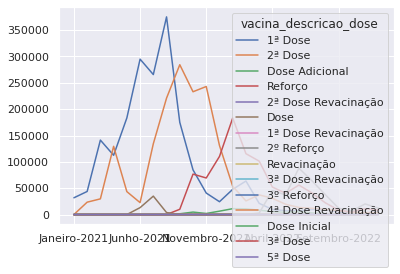

In [115]:
GO_Count_Mes_Dose.plot()

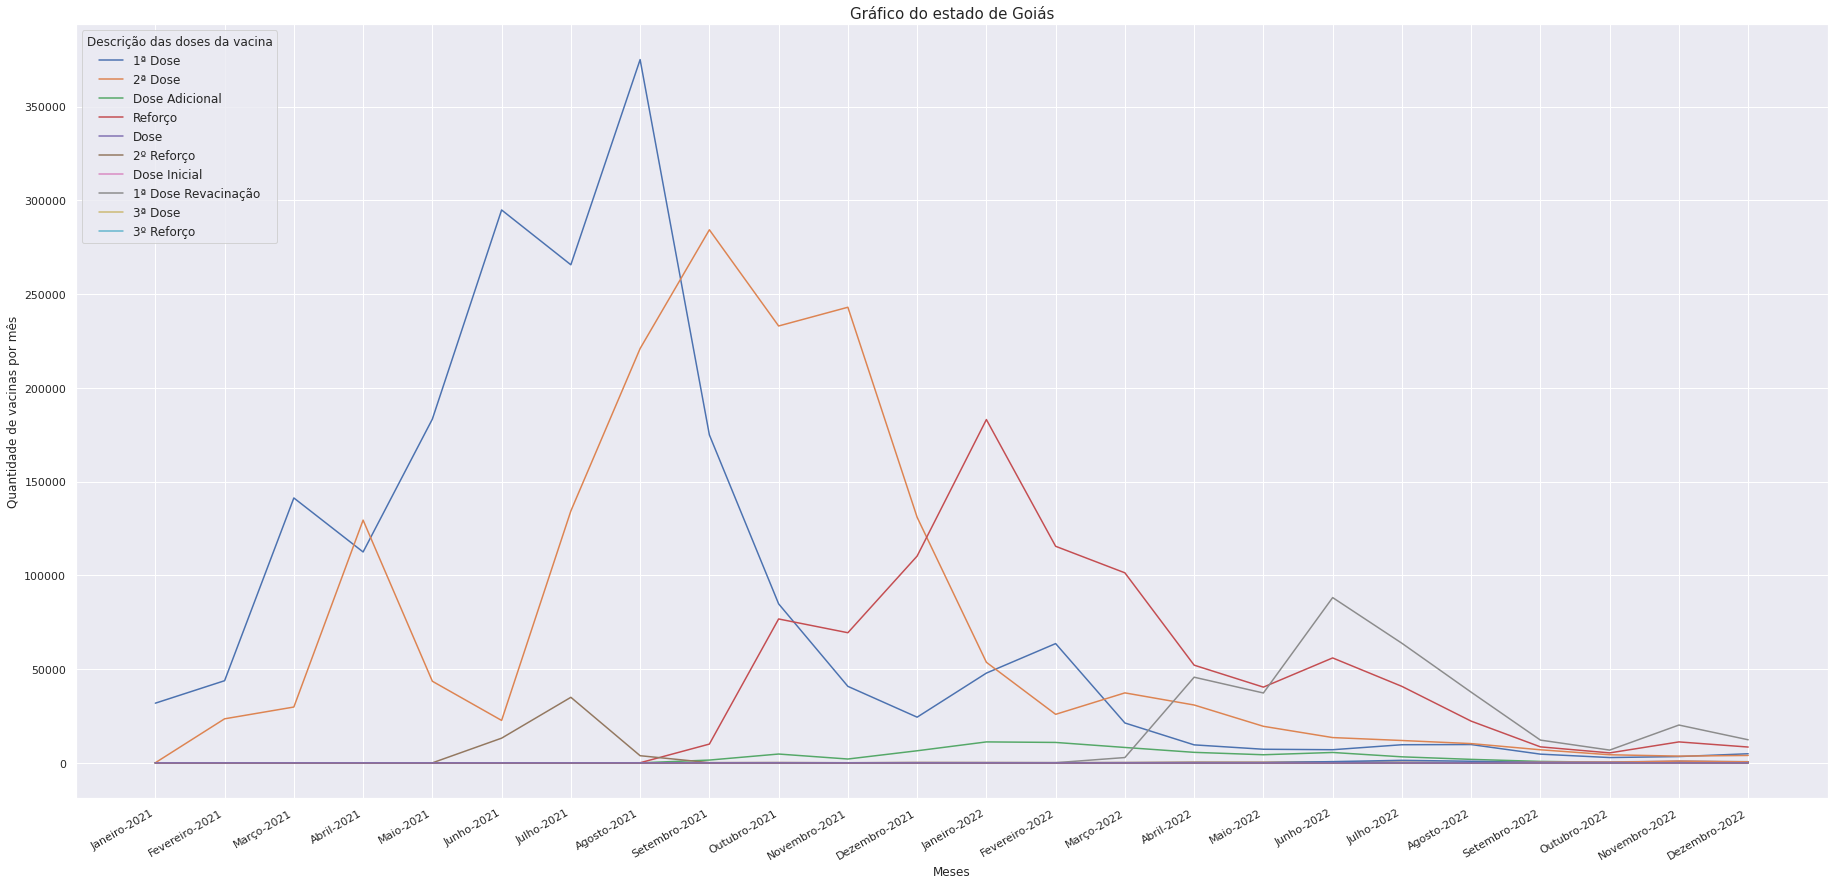

In [116]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(GO_Count_Mes_Dose)
plt.gcf().autofmt_xdate() 
plt.legend(['1ª Dose', '2ª Dose', 'Dose Adicional', 'Reforço','Dose','2º Reforço','Dose Inicial','1ª Dose Revacinação','3ª Dose','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

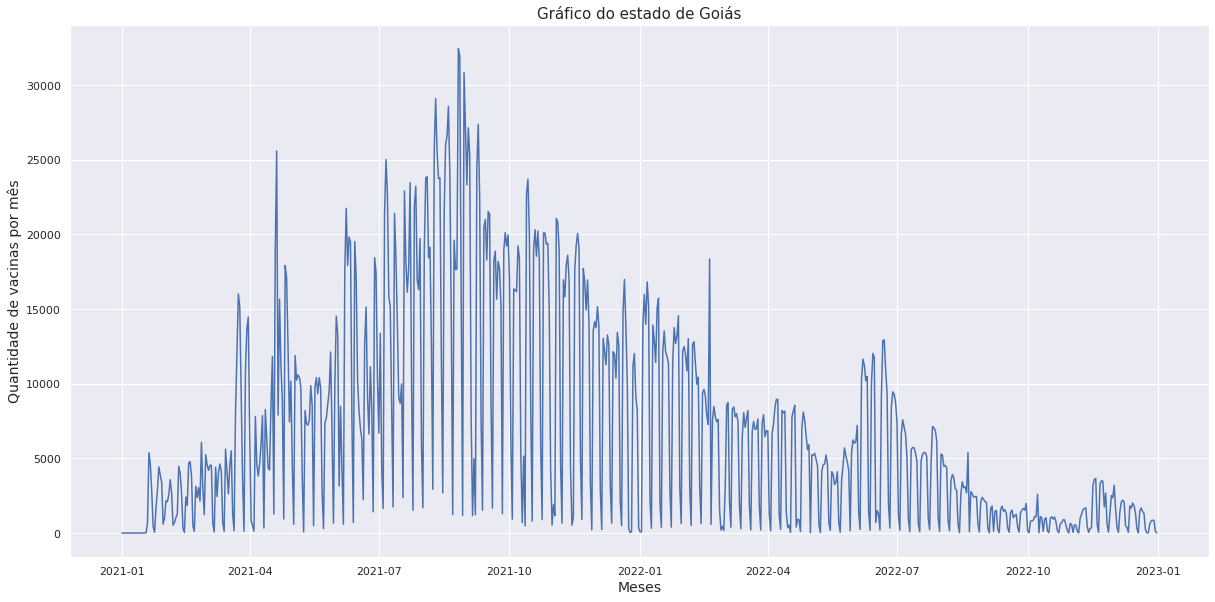

In [117]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(GO_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_GO1.groupby***

In [118]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['1926585', '1669493','54263']
}
  
# criando outro DataFrame
GO_Vac = pd.DataFrame(GO_dataN)

In [119]:
GO_Vac['Id_qtd_dose'] = GO_Vac['Id_qtd_dose'].astype(int)

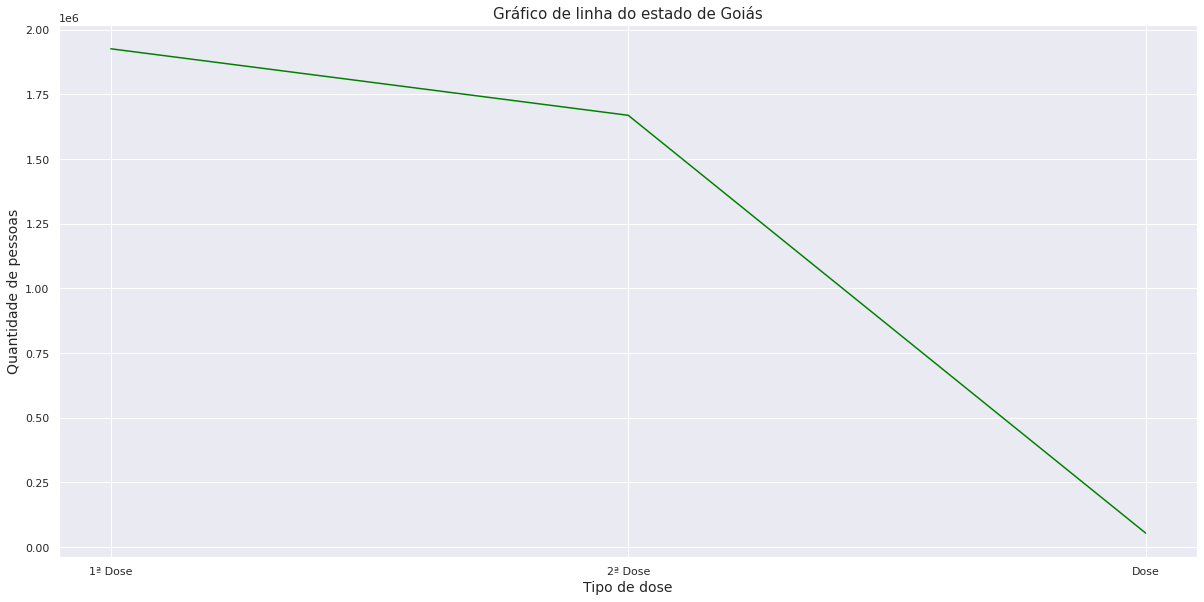

In [120]:
plt.figure(figsize=(20.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

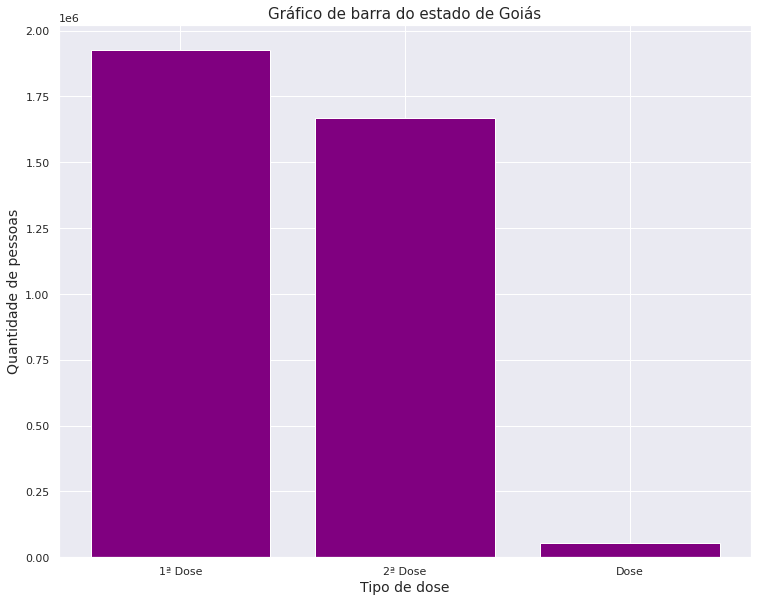

In [121]:
plt.figure(figsize=(12.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_GO1.groupby***



In [122]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','2ª Dose','2ª Reforço','3ª Dose','3ª Reforço','Dose','Dose Adicional','Dose Inicial','Reforço'],
    'Id_qtd_dose': ['1926585', '1', '1669493', '144185','1','256','54263','58903','1','793509']
}
  
# criando outro DataFrame
GO_Todas_Vac = pd.DataFrame(GO_dataN2)

In [123]:
GO_Todas_Vac['Id_qtd_dose'] = GO_Todas_Vac['Id_qtd_dose'].astype(int)

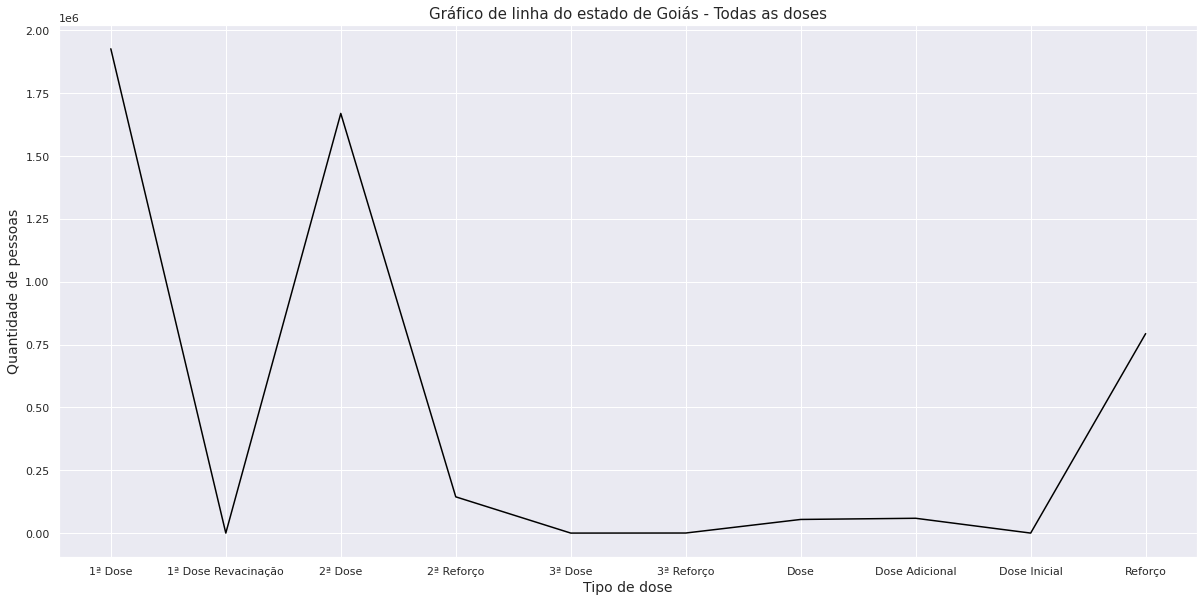

In [124]:
plt.figure(figsize=(20.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

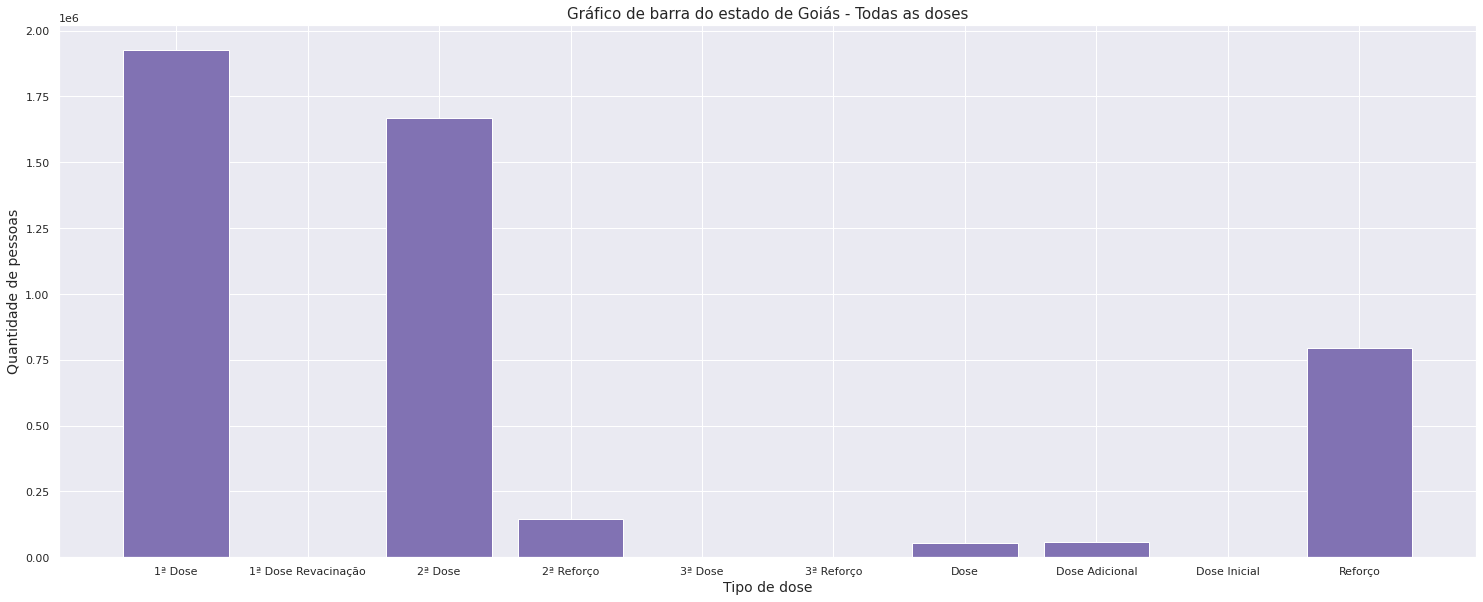

In [125]:
plt.figure(figsize=(25.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

# **Gráficos - Mato Grosso**

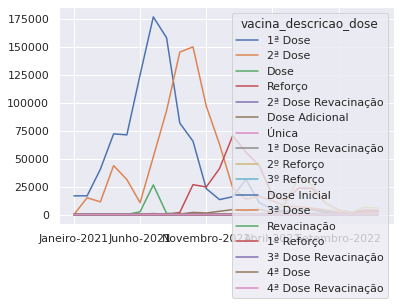

In [126]:
MT_Count_Mes_Dose.plot()

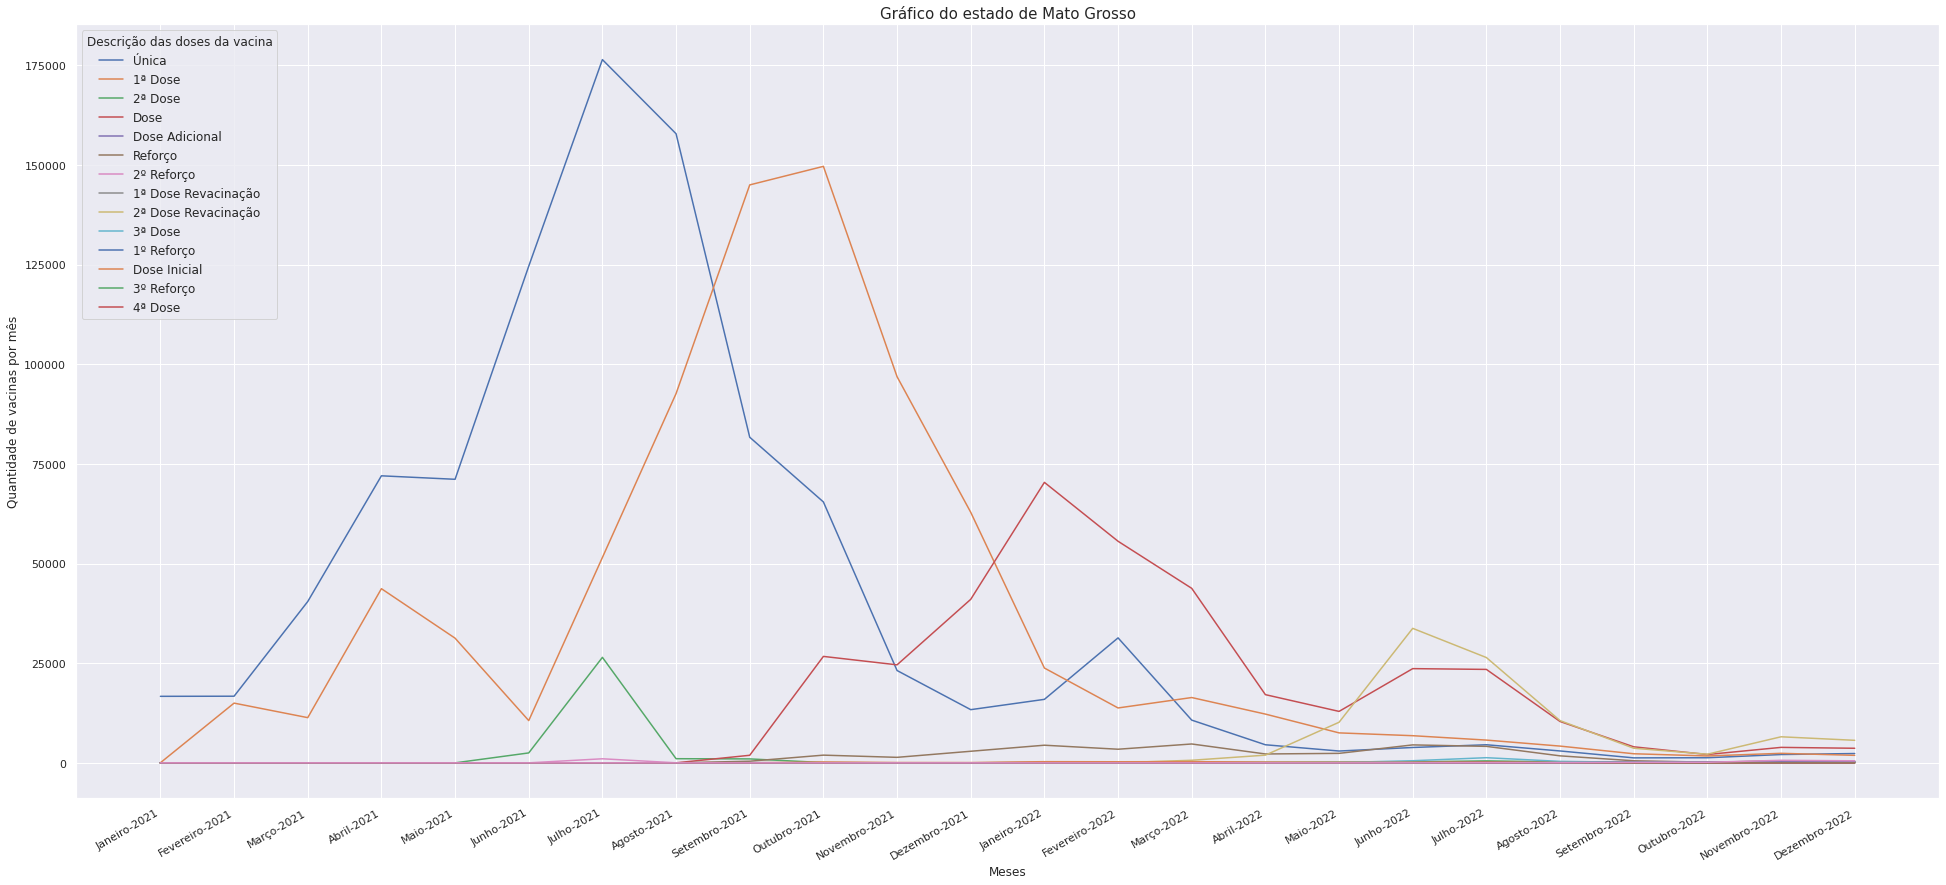

In [127]:
plt.figure(figsize=(33.4,15.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(MT_Count_Mes_Dose)
plt.gcf().autofmt_xdate() 
plt.legend(['Única','1ª Dose', '2ª Dose', 'Dose','Dose Adicional', 'Reforço','2º Reforço','1ª Dose Revacinação','2ª Dose Revacinação','3ª Dose','1º Reforço','Dose Inicial','3º Reforço','4ª Dose'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

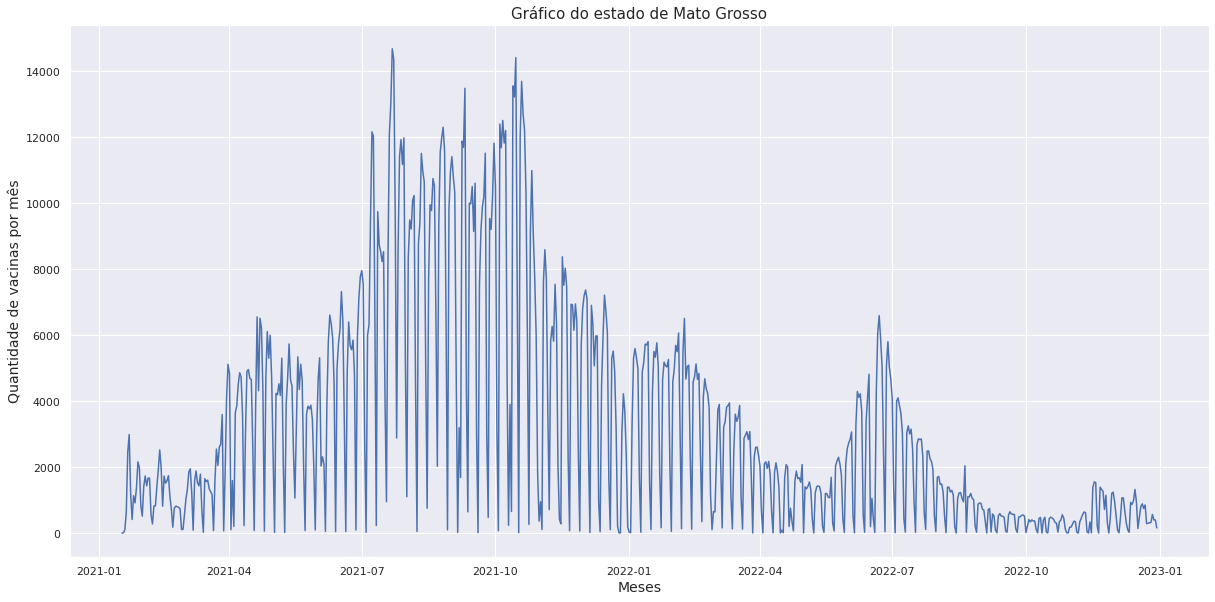

In [128]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(MT_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_MT1.groupby***

In [129]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
MT_Vac = pd.DataFrame(MT_dataN)

In [130]:
MT_Vac['Id_qtd_dose'] = MT_Vac['Id_qtd_dose'].astype(int)

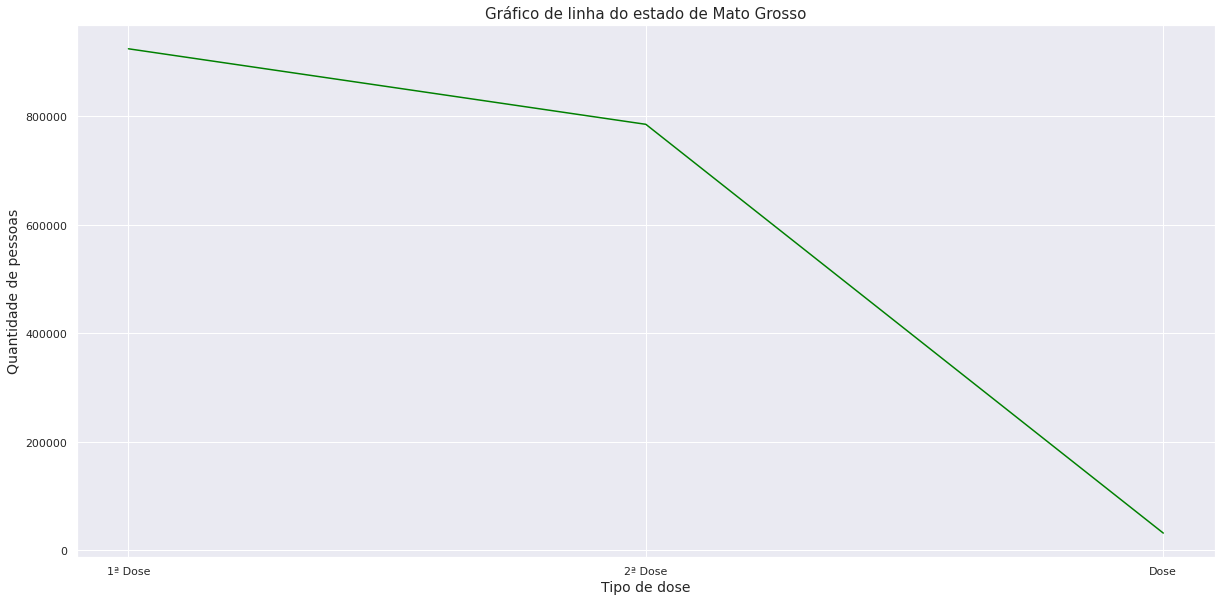

In [131]:
plt.figure(figsize=(20.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

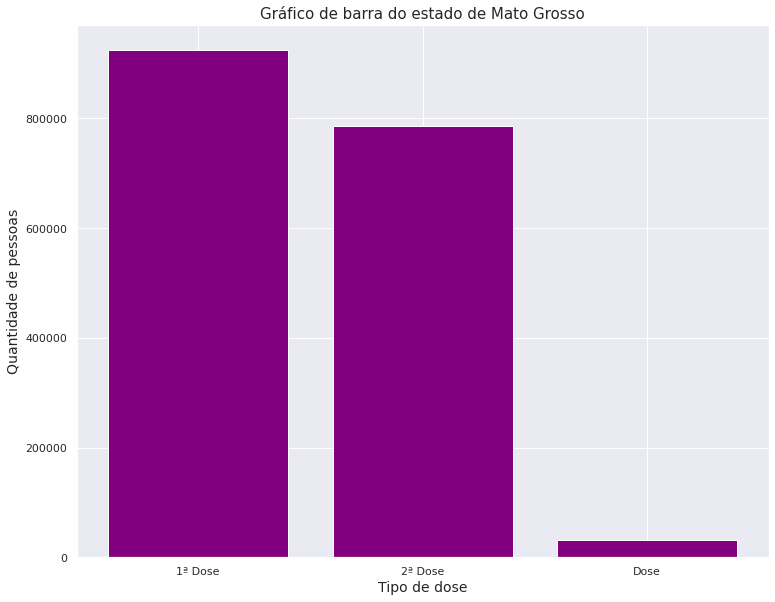

In [132]:
plt.figure(figsize=(12.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_MT1.groupby***



In [133]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
MT_Todas_Vac = pd.DataFrame(MT_dataN2)

In [134]:
MT_Todas_Vac['Id_qtd_dose'] = MT_Todas_Vac['Id_qtd_dose'].astype(int)

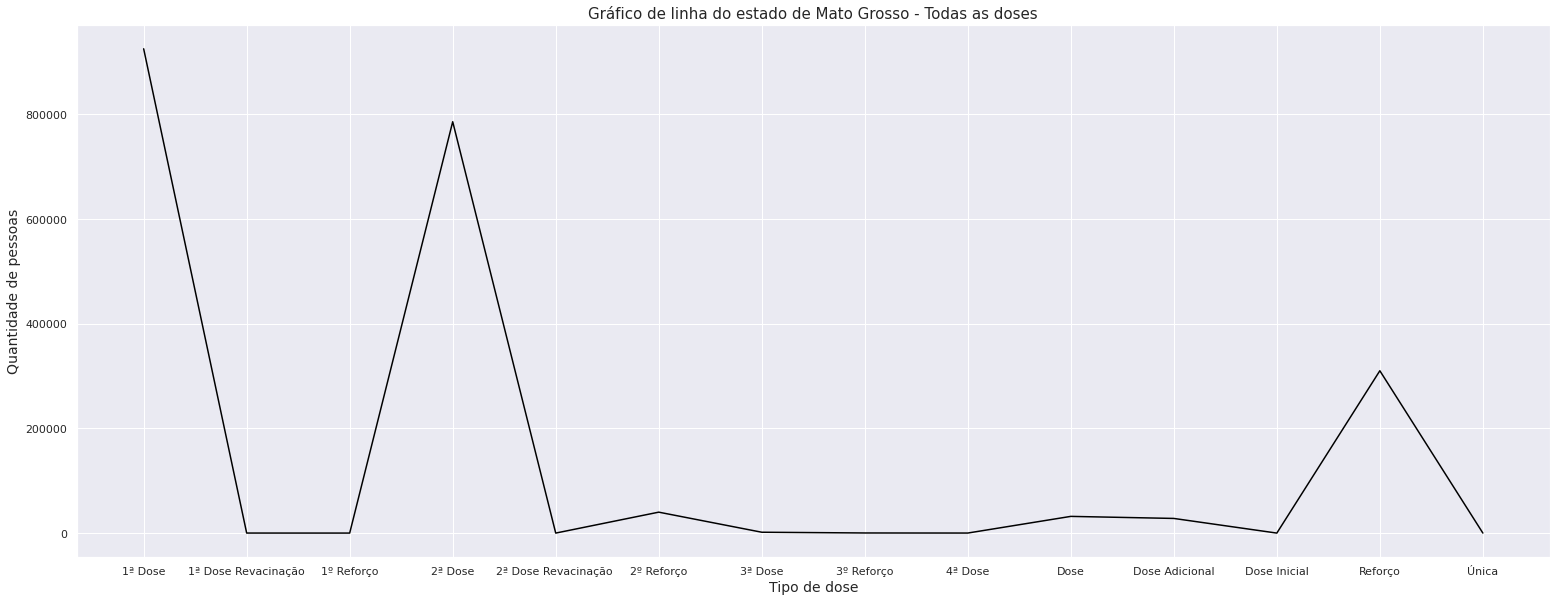

In [135]:
plt.figure(figsize=(26.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

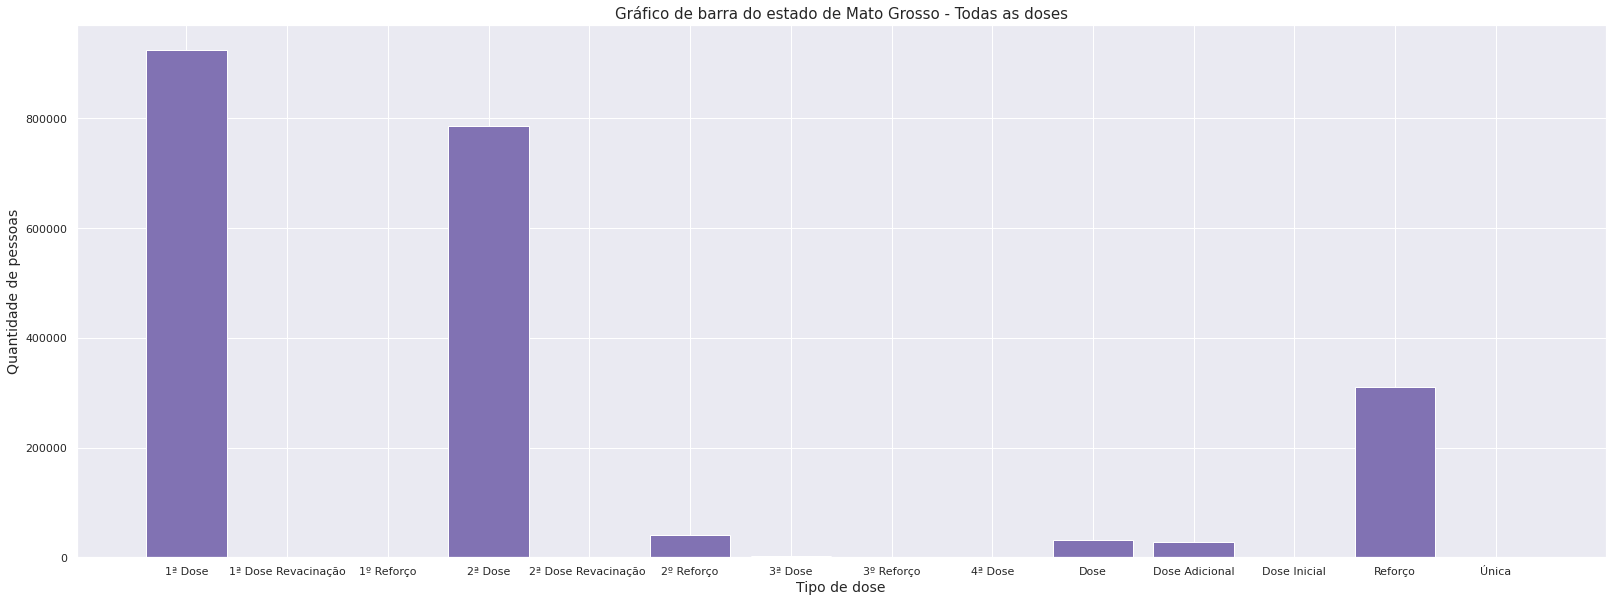

In [136]:
plt.figure(figsize=(27.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

# **Gráficos - Mato Grosso Do Sul**

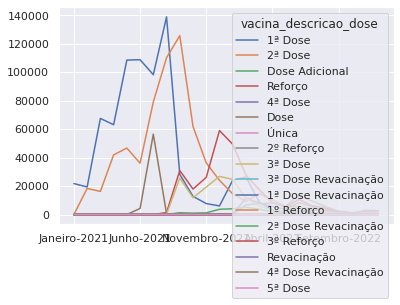

In [137]:
MS_Count_Mes_Dose.plot()

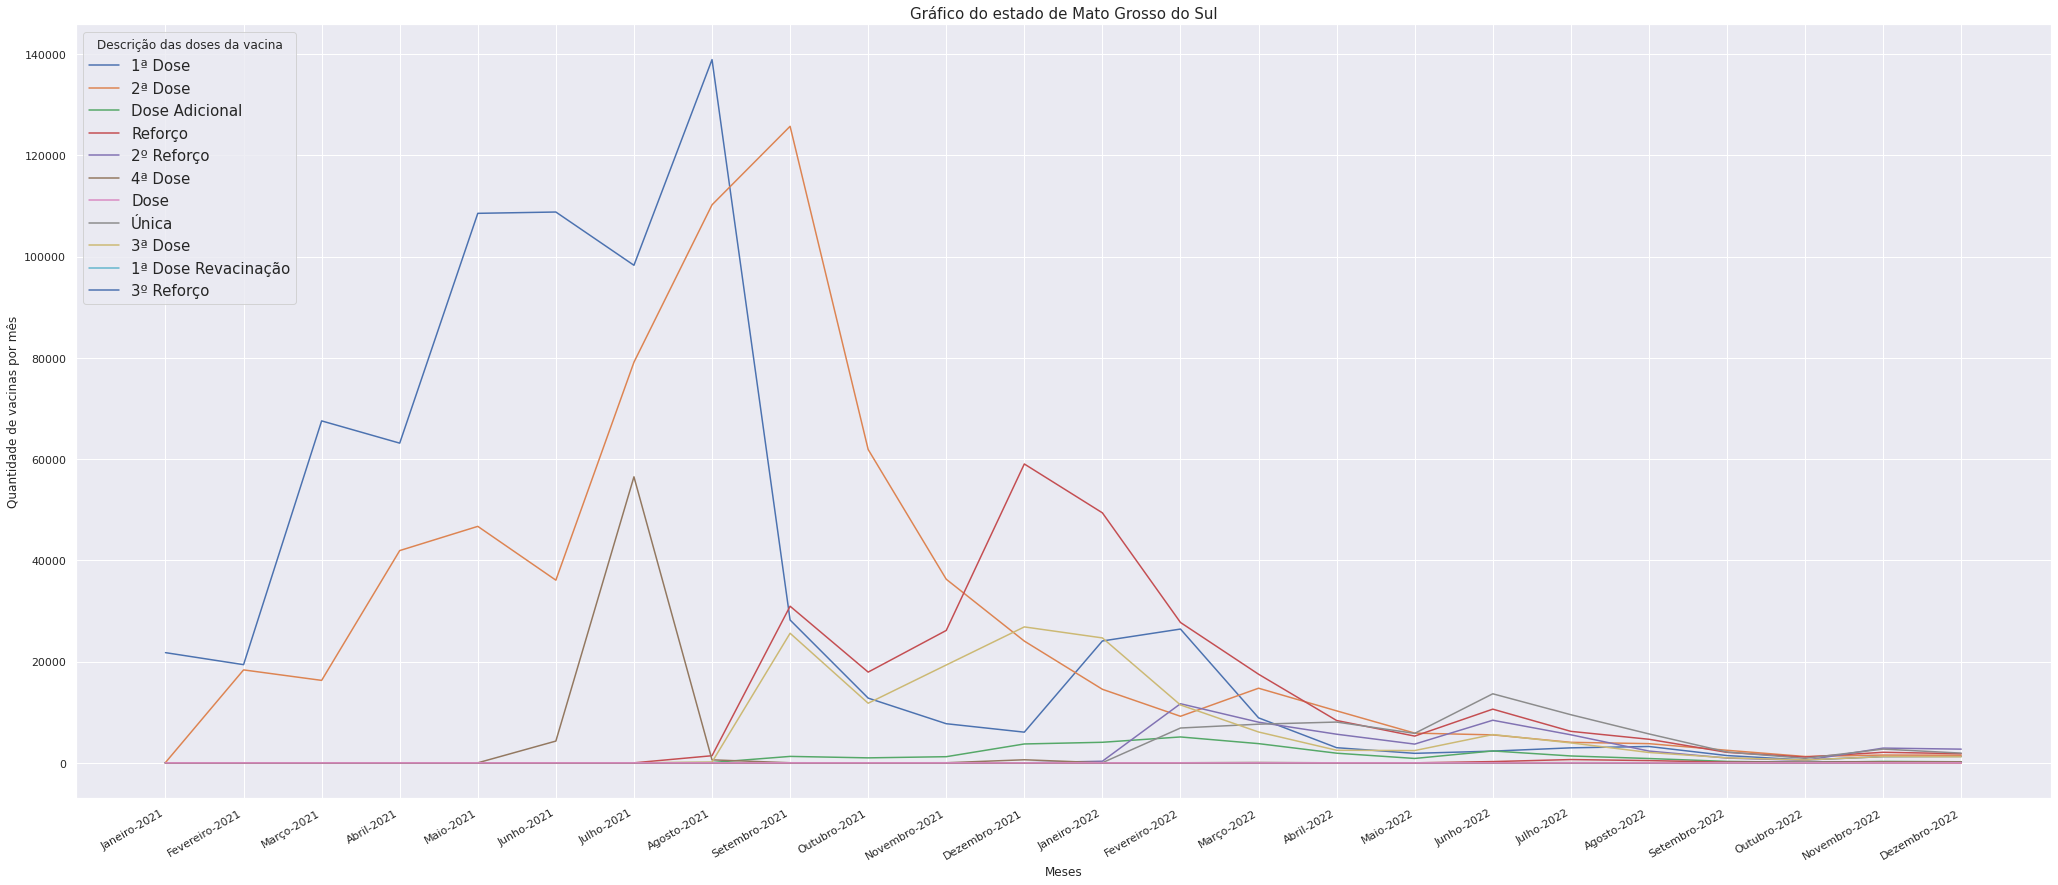

In [138]:
plt.figure(figsize=(35.4,15.8))
plt.title("Gráfico do estado de Mato Grosso do Sul",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(MS_Count_Mes_Dose)
plt.gcf().autofmt_xdate()
plt.legend(['1ª Dose', '2ª Dose', 'Dose Adicional','Reforço','2º Reforço','4ª Dose','Dose','Única','3ª Dose','1ª Dose Revacinação','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=15)
plt.show()

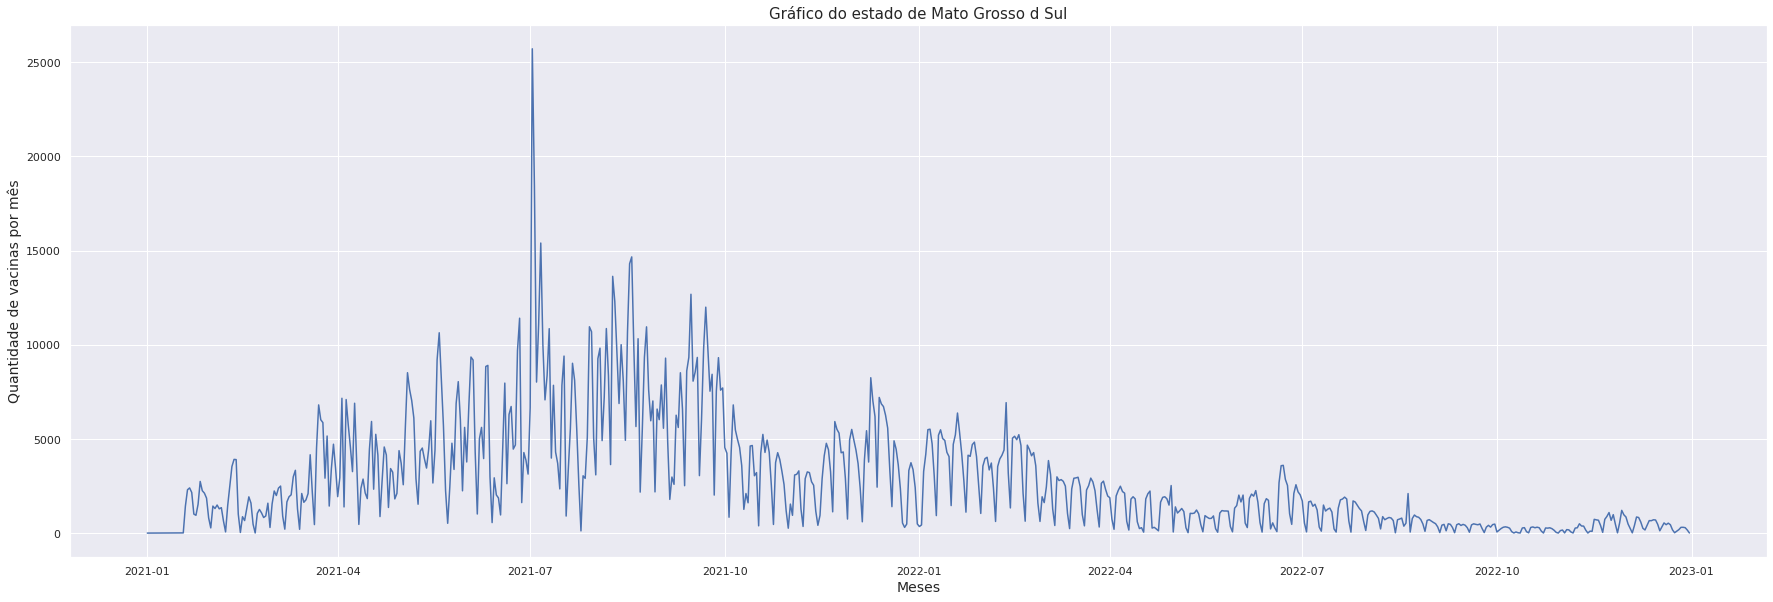

In [139]:
plt.figure(figsize=(30.4,9.8))
plt.title("Gráfico do estado de Mato Grosso d Sul",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(MS_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_MS1.groupby***

In [140]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MS_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
MS_Vac = pd.DataFrame(MS_dataN)

In [141]:
MS_Vac['Id_qtd_dose'] = MS_Vac['Id_qtd_dose'].astype(int)

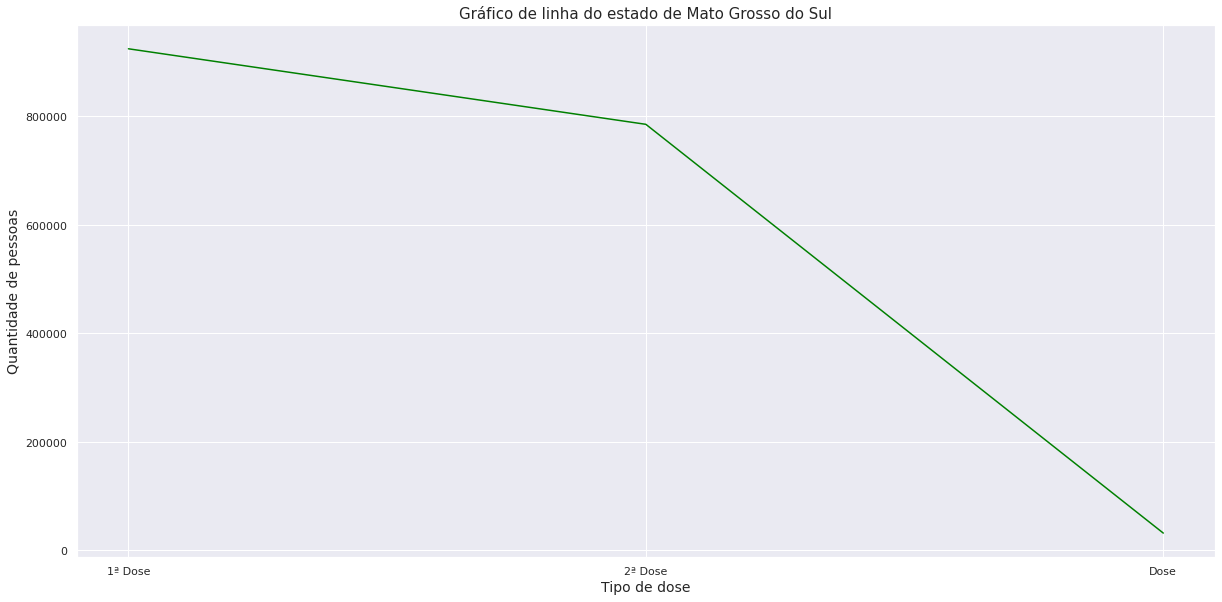

In [142]:
plt.figure(figsize=(20.4,9.8))
x = MS_Vac['vacina_descricao_dose']
y = MS_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso do Sul",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

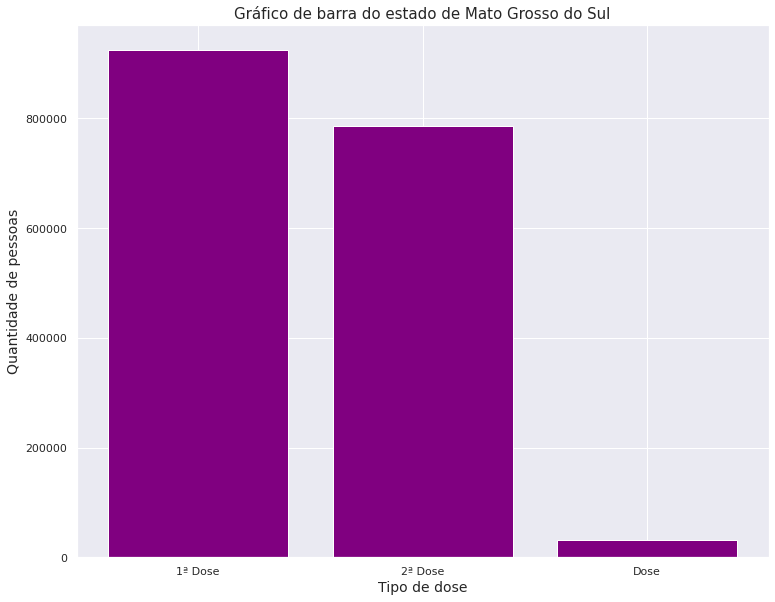

In [143]:
plt.figure(figsize=(12.4,9.8))
x = MS_Vac['vacina_descricao_dose']
y = MS_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso do Sul",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_MS1.groupby***



In [144]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MS_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
MS_Todas_Vac = pd.DataFrame(MS_dataN2)

In [145]:
MS_Todas_Vac['Id_qtd_dose'] = MS_Todas_Vac['Id_qtd_dose'].astype(int)

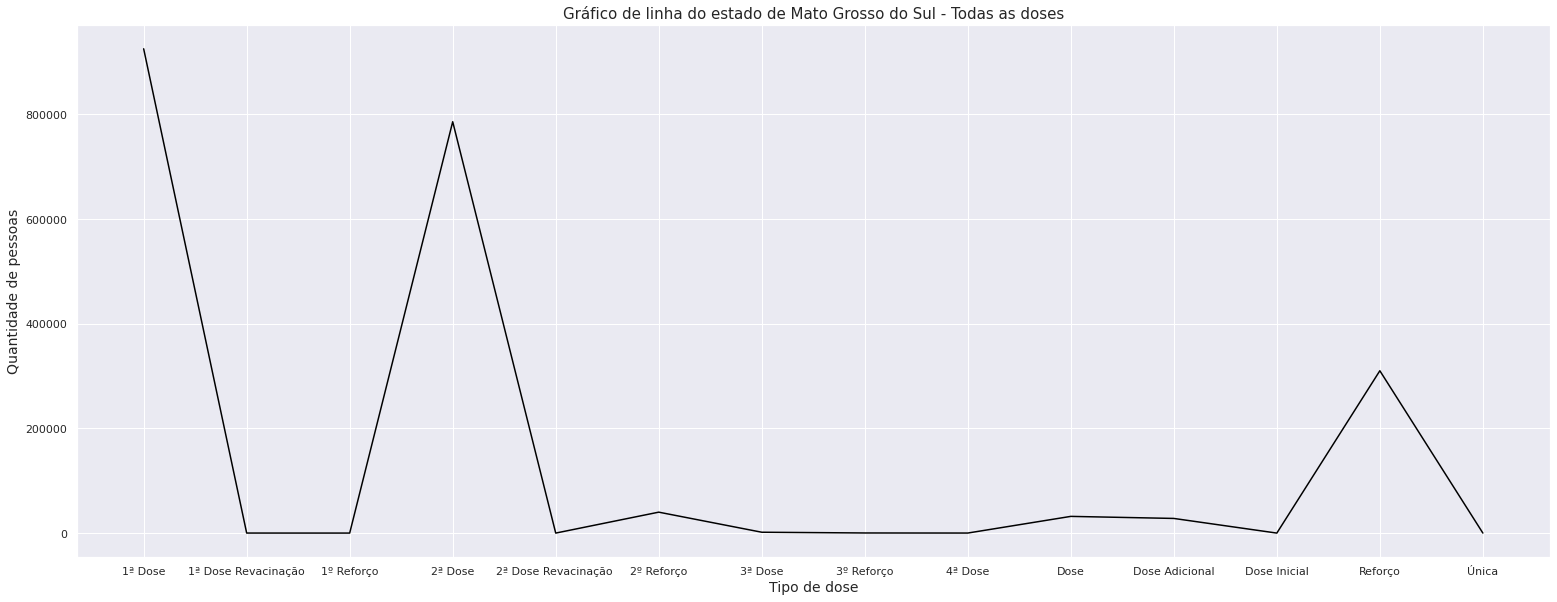

In [146]:
plt.figure(figsize=(26.4,9.8))
x = MS_Todas_Vac['vacina_descricao_dose']
y = MS_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso do Sul - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

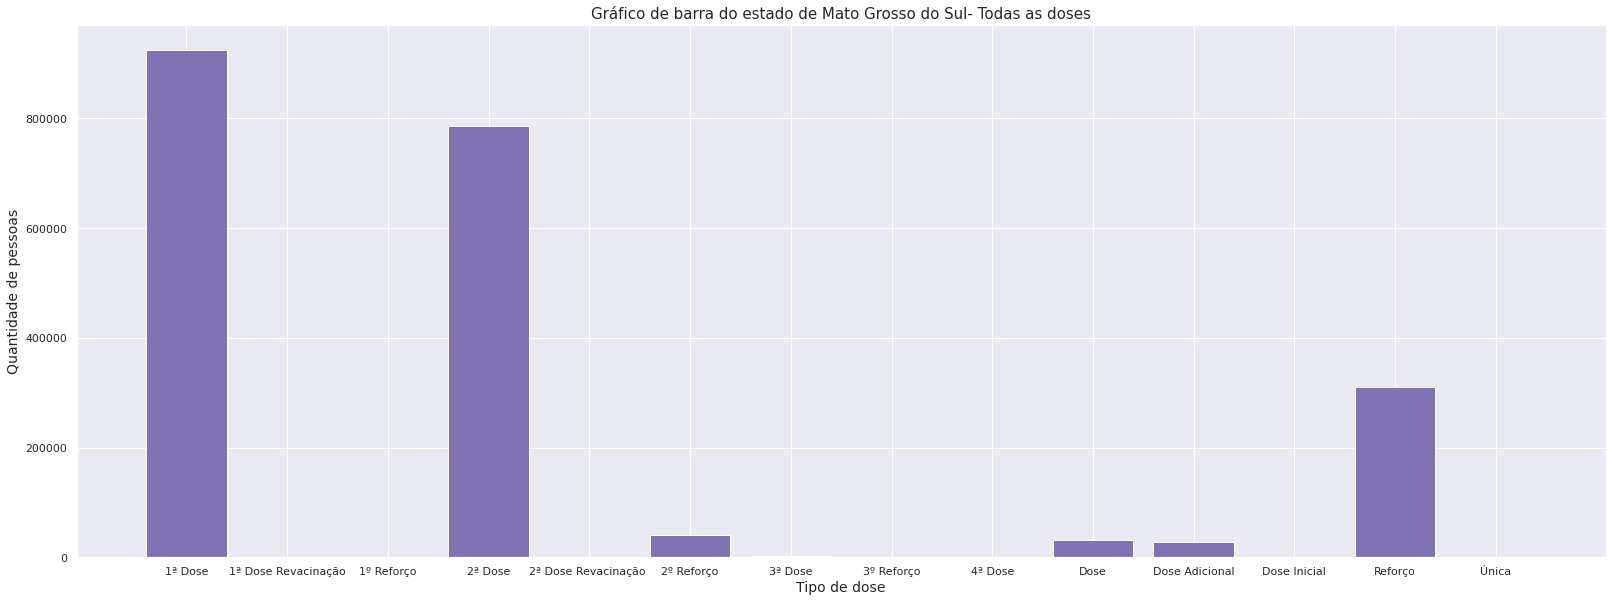

In [147]:
plt.figure(figsize=(27.4,9.8))
x = MS_Todas_Vac['vacina_descricao_dose']
y = MS_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso do Sul- Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

#**Gráficos - Distrito Federal**

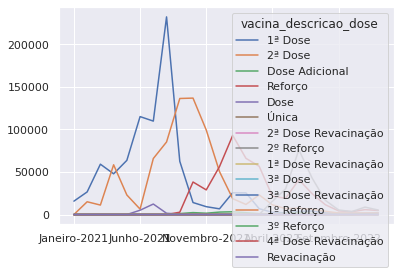

In [148]:
DF_Count_Mes_Dose.plot()

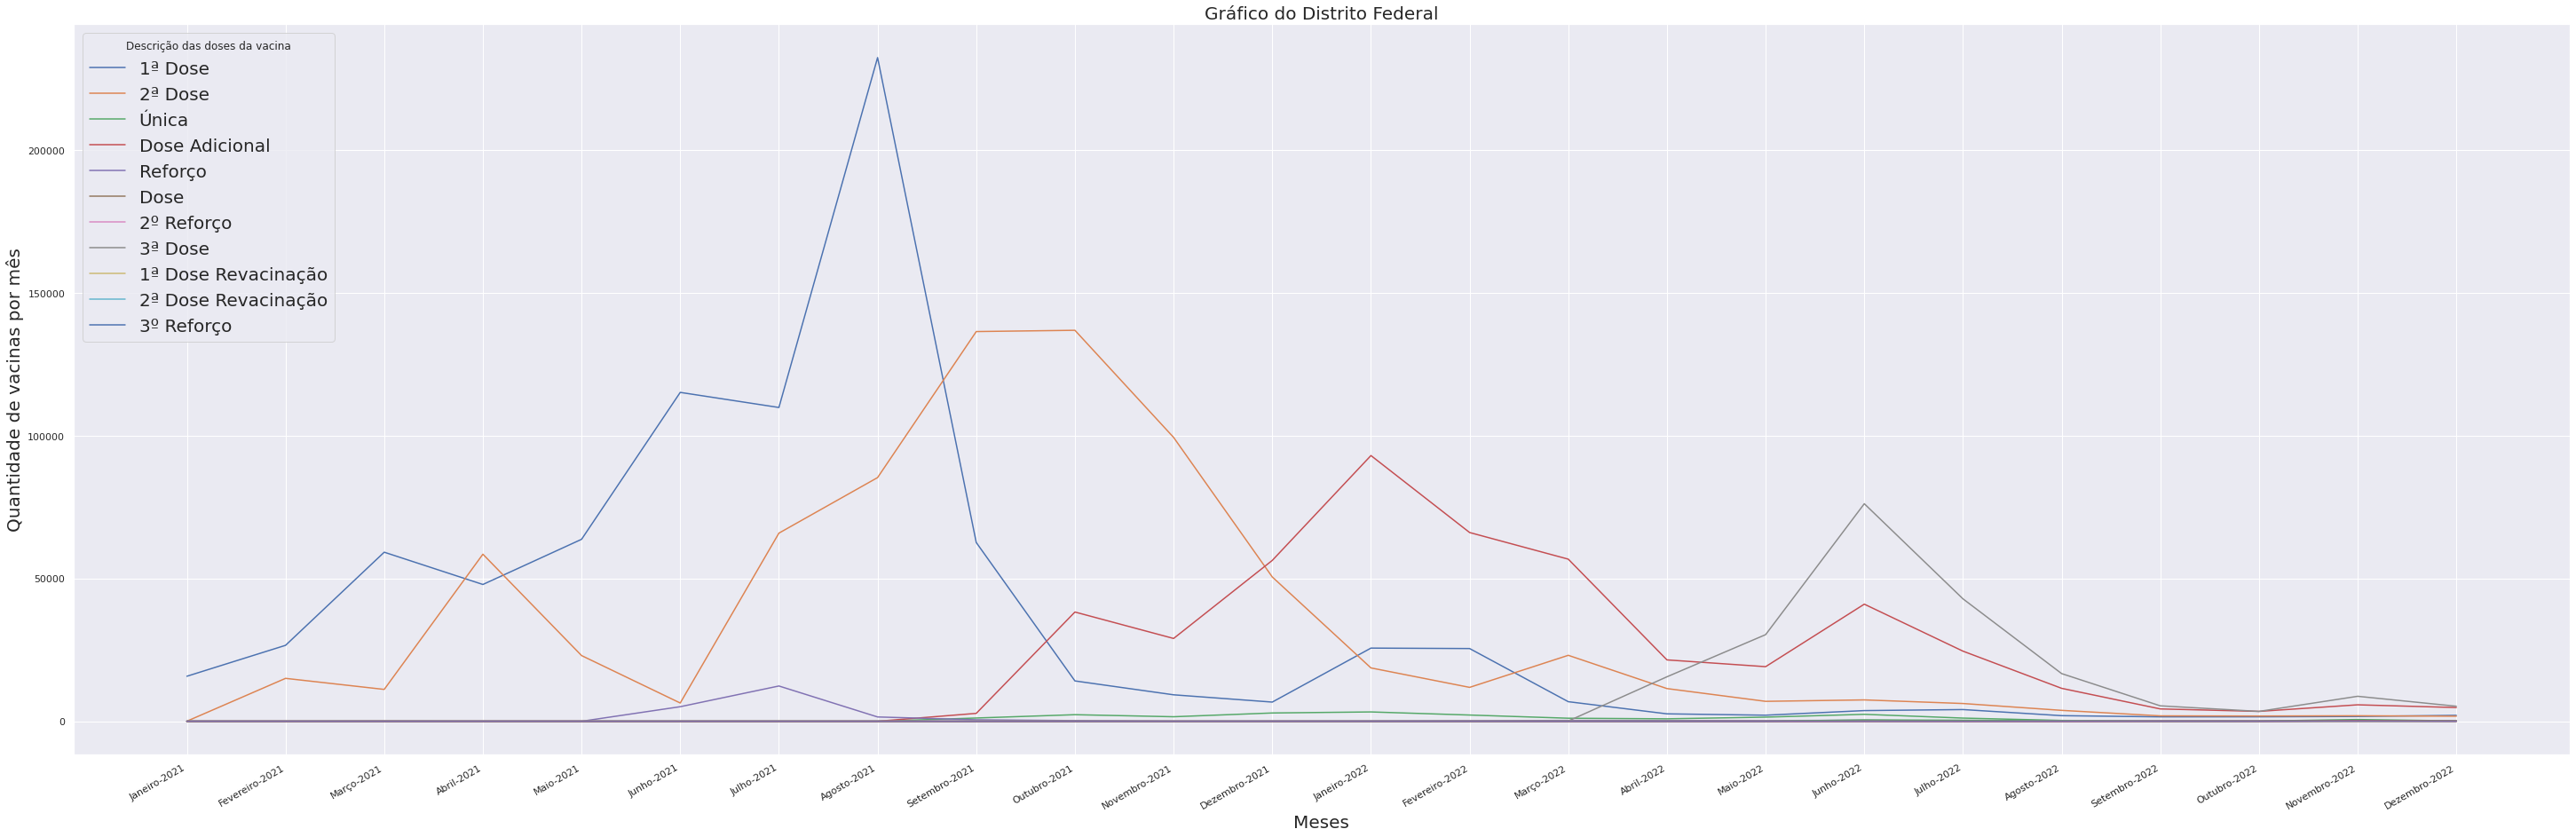

In [149]:
plt.figure(figsize=(50.4,16.8))
plt.title("Gráfico do Distrito Federal",fontsize=20)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 20)
plt.xlabel('Meses',fontsize = 20)
plt.plot(DF_Count_Mes_Dose)
plt.gcf().autofmt_xdate()
plt.legend(['1ª Dose', '2ª Dose','Única','Dose Adicional', 'Reforço','Dose','2º Reforço','3ª Dose','1ª Dose Revacinação','2ª Dose Revacinação','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=20)
plt.show()

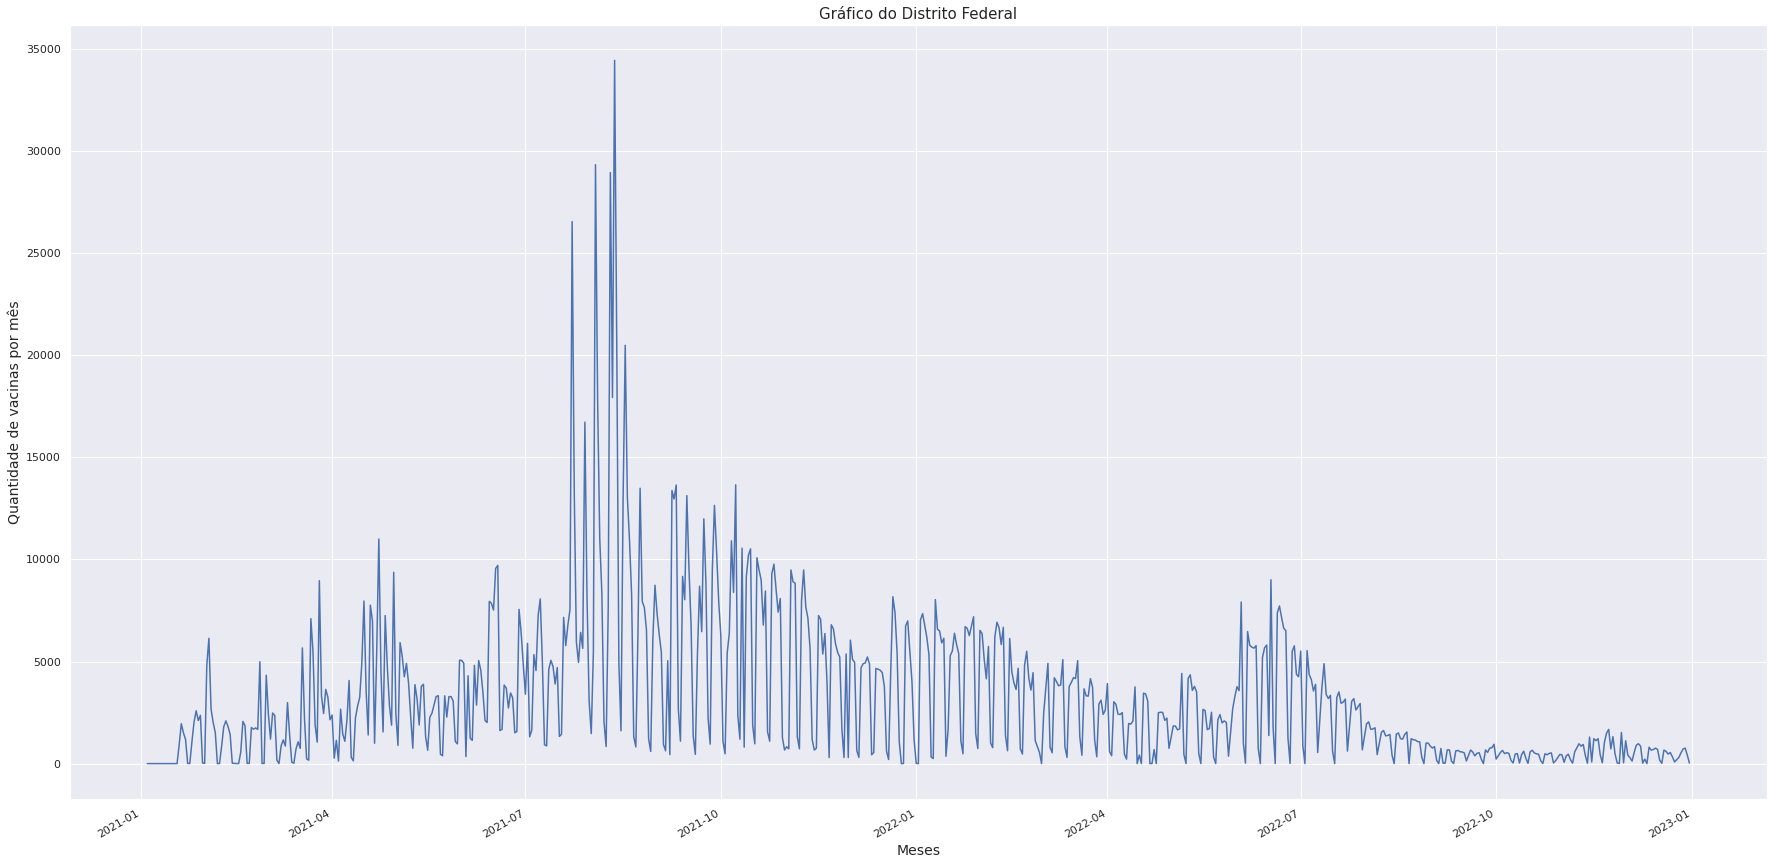

In [161]:
plt.figure(figsize=(30.4,15.8))
plt.title("Gráfico do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.gcf().autofmt_xdate()
plt.plot(DF_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_DF1.groupby***

In [151]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
DF_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
DF_Vac = pd.DataFrame(DF_dataN)

In [152]:
DF_Vac['Id_qtd_dose'] = DF_Vac['Id_qtd_dose'].astype(int)

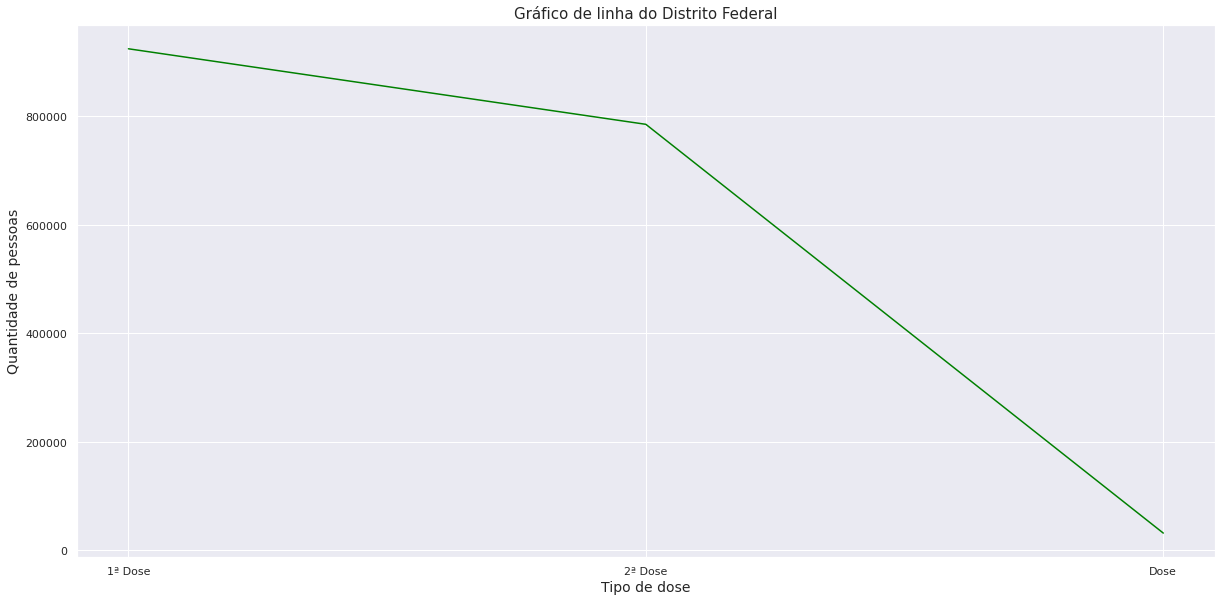

In [153]:
plt.figure(figsize=(20.4,9.8))
x = DF_Vac['vacina_descricao_dose']
y = DF_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do Distrito Federal",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

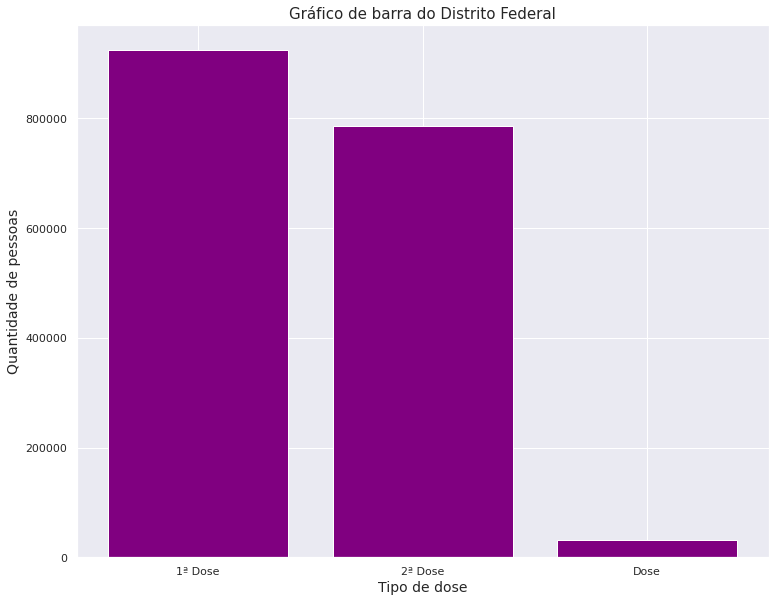

In [154]:
plt.figure(figsize=(12.4,9.8))
x = DF_Vac['vacina_descricao_dose']
y = DF_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do Distrito Federal",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_DF1.groupby***



In [155]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
DF_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
DF_Todas_Vac = pd.DataFrame(DF_dataN2)

In [156]:
DF_Todas_Vac['Id_qtd_dose'] = DF_Todas_Vac['Id_qtd_dose'].astype(int)

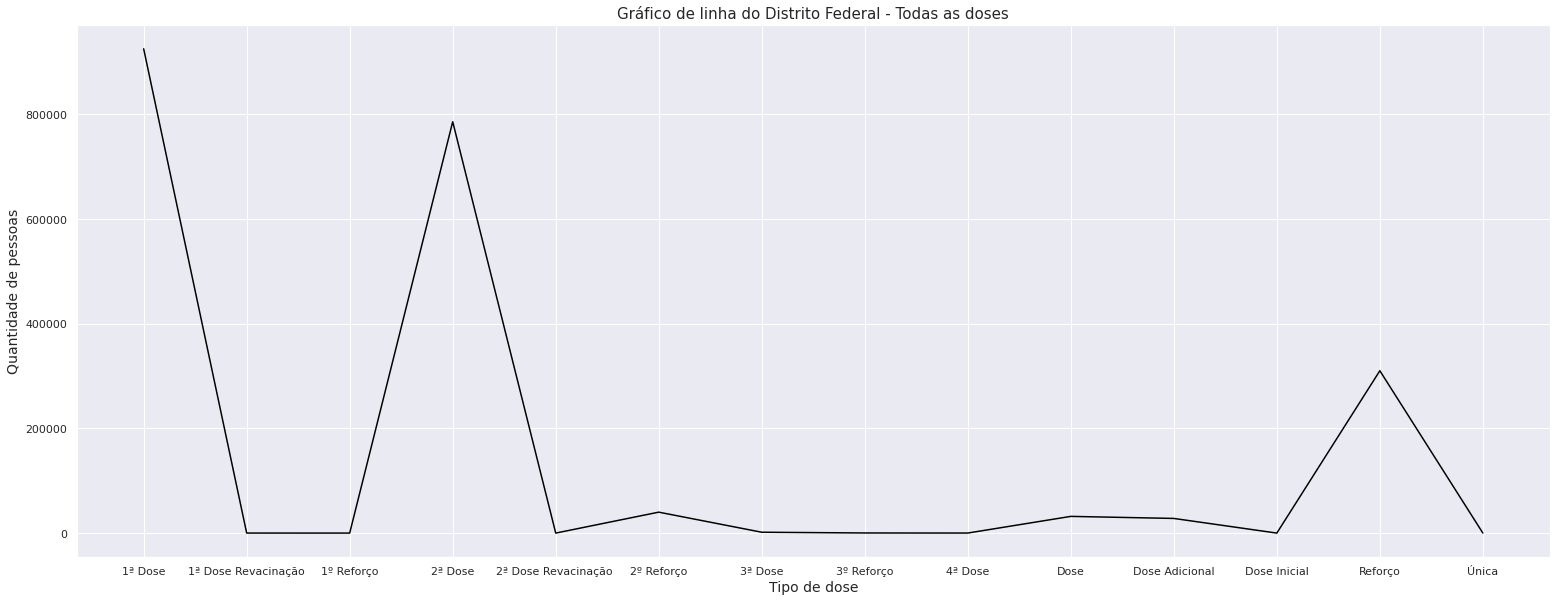

In [157]:
plt.figure(figsize=(26.4,9.8))
x = DF_Todas_Vac['vacina_descricao_dose']
y = DF_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do Distrito Federal - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

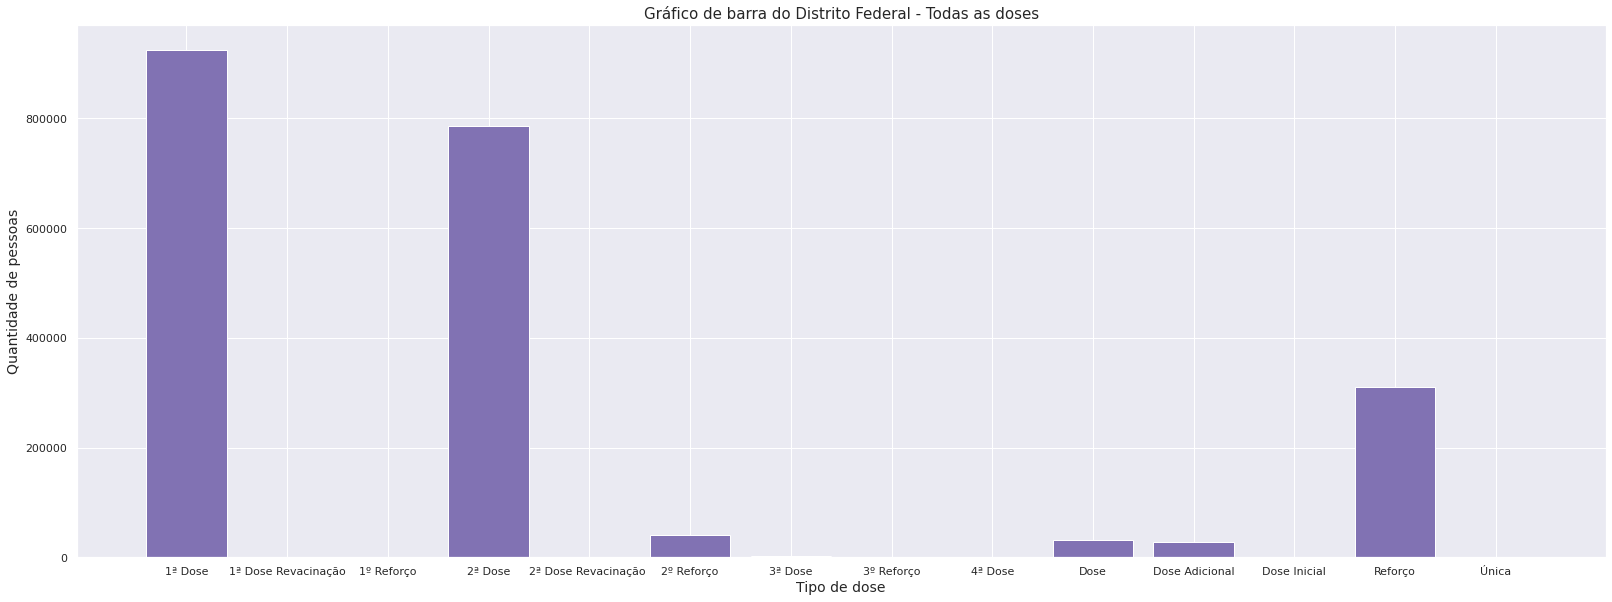

In [158]:
plt.figure(figsize=(27.4,9.8))
x = DF_Todas_Vac['vacina_descricao_dose']
y = DF_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do Distrito Federal - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()